In [9]:
from pyimsl.math.cubSplineInterpECnd import cubSplineInterpECnd
from pyimsl.math.cubSplineValue import cubSplineValue
from pyimsl.math.cubSplineIntegral import cubSplineIntegral
import matplotlib.pyplot as plt
from math import sin, cos, pi
from IPython.display import display, HTML
import pandas as pd

In [10]:
print("Lab 8 Var 01", "3430302/90003", "Biga V.S", "F(x) = sin^2(x)", "[a;b] = [-pi/4; pi/4]", sep='\n', end='\n\n')
a = -pi/4
b = pi/4
F = lambda x : (sin(x))**2
number_partions = [10, 20, 40, 80, 160]
x_value = lambda i: a + i*((b - a)/(4*N))
x_spline = lambda i: a + i*((b - a)/(N))

difference =  lambda count, estimate_list: estimate_list[count]/estimate_list[count + 1]

#integral_func = lambda x: (x/2 - sin(x)*cos(x)/2) - (a/2 - sin(a)*cos(a)/2)
integral_func = lambda x: (x/2 - sin(2*x)/4 - (a/2 - sin(2*a)/4))
first_diff = lambda x : 2*sin(x)*cos(x)
second_diff = lambda x : 2*(-sin(x)**2 + cos(x)**2)
third_diff = lambda x: -8*sin(x)*cos(x)
max_error_Integral = []
max_error_Spline = []
max_error_Diff_1 = []
max_error_Diff_2 = []
max_error_Diff_3 = []

estimate_Integral = []
estimate_Spline = []
estimate_Diff_1 = []
estimate_Diff_2 = []
estimate_Diff_3 = []

Lab 8 Var 01
3430302/90003
Biga V.S
F(x) = sin^2(x)
[a;b] = [-pi/4; pi/4]



//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  10



,x,f(x),Interpolant,error,Integral,Interpolant Integral,error,Diff 1,Interpolant Diff 1,error,Diff 2,Interpolant Diff 2,error,Diff 3,Interpolant Diff 3,error
0,-0.785398,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.001666e+00,1.665604e-03,4.440892e-16,0.037940,0.037940,4.000000,3.660742,0.339258
1,-0.746128,0.460770,0.460731,0.000040,0.018864,0.018863,9.348903e-07,-0.996917,-9.973531e-01,4.357271e-04,1.569182e-01,0.181697,0.024778,3.987669,3.660742,0.326927
2,-0.706858,0.421783,0.421742,0.000041,0.036192,0.036189,2.606354e-06,-0.987688,-9.873952e-01,2.931477e-04,3.128689e-01,0.325454,0.012585,3.950753,3.660742,0.290011
3,-0.667588,0.383277,0.383255,0.000022,0.051997,0.051993,3.883061e-06,-0.972370,-9.717920e-01,5.779202e-04,4.668907e-01,0.469211,0.002320,3.889480,3.660742,0.228737
4,-0.628319,0.345492,0.345492,0.000000,0.066304,0.066300,4.313714e-06,-0.951057,-9.505435e-01,5.130334e-04,6.180340e-01,0.612968,0.005066,3.804226,3.660742,0.143484
5,-0.589049,0.308658,0.308673,0.000015,0.079145,0.079141,3.981486e-06,-0.923880,-9.236496e-01,2.298916e-04,7.653669e-01,0.756725,0.008642,3.695518,3.660742,0.034776
6,-0.549779,0.273005,0.273022,0.000017,0.090561,0.090558,3.301478e-06,-0.891007,-8.911105e-01,1.039501e-04,9.079810e-01,0.900482,0.007499,3.564026,3.660742,0.096716
7,-0.510509,0.238751,0.238760,0.000009,0.100605,0.100602,2.762461e-06,-0.852640,-8.529260e-01,2.858186e-04,1.044997e+00,1.044239,0.000759,3.410561,3.660742,0.250182
8,-0.471239,0.206107,0.206107,0.000000,0.109334,0.109331,2.614493e-06,-0.809017,-8.090962e-01,7.917254e-05,1.175571e+00,1.187996,0.012425,3.236068,2.818035,0.418033
9,-0.431969,0.175276,0.175279,0.000003,0.116816,0.116813,2.587829e-06,-0.760406,-7.602708e-01,1.351590e-04,1.298896e+00,1.298660,0.000237,3.041624,2.818035,0.223589



Max_errors:	
Integral:	4.313714151701897e-06	
Function:	4.0796575295043436e-05	
Diff 1:	0.0016656040909190928	
Diff 2:	0.0379395063884231	
Diff 3:	0.6263081956588008



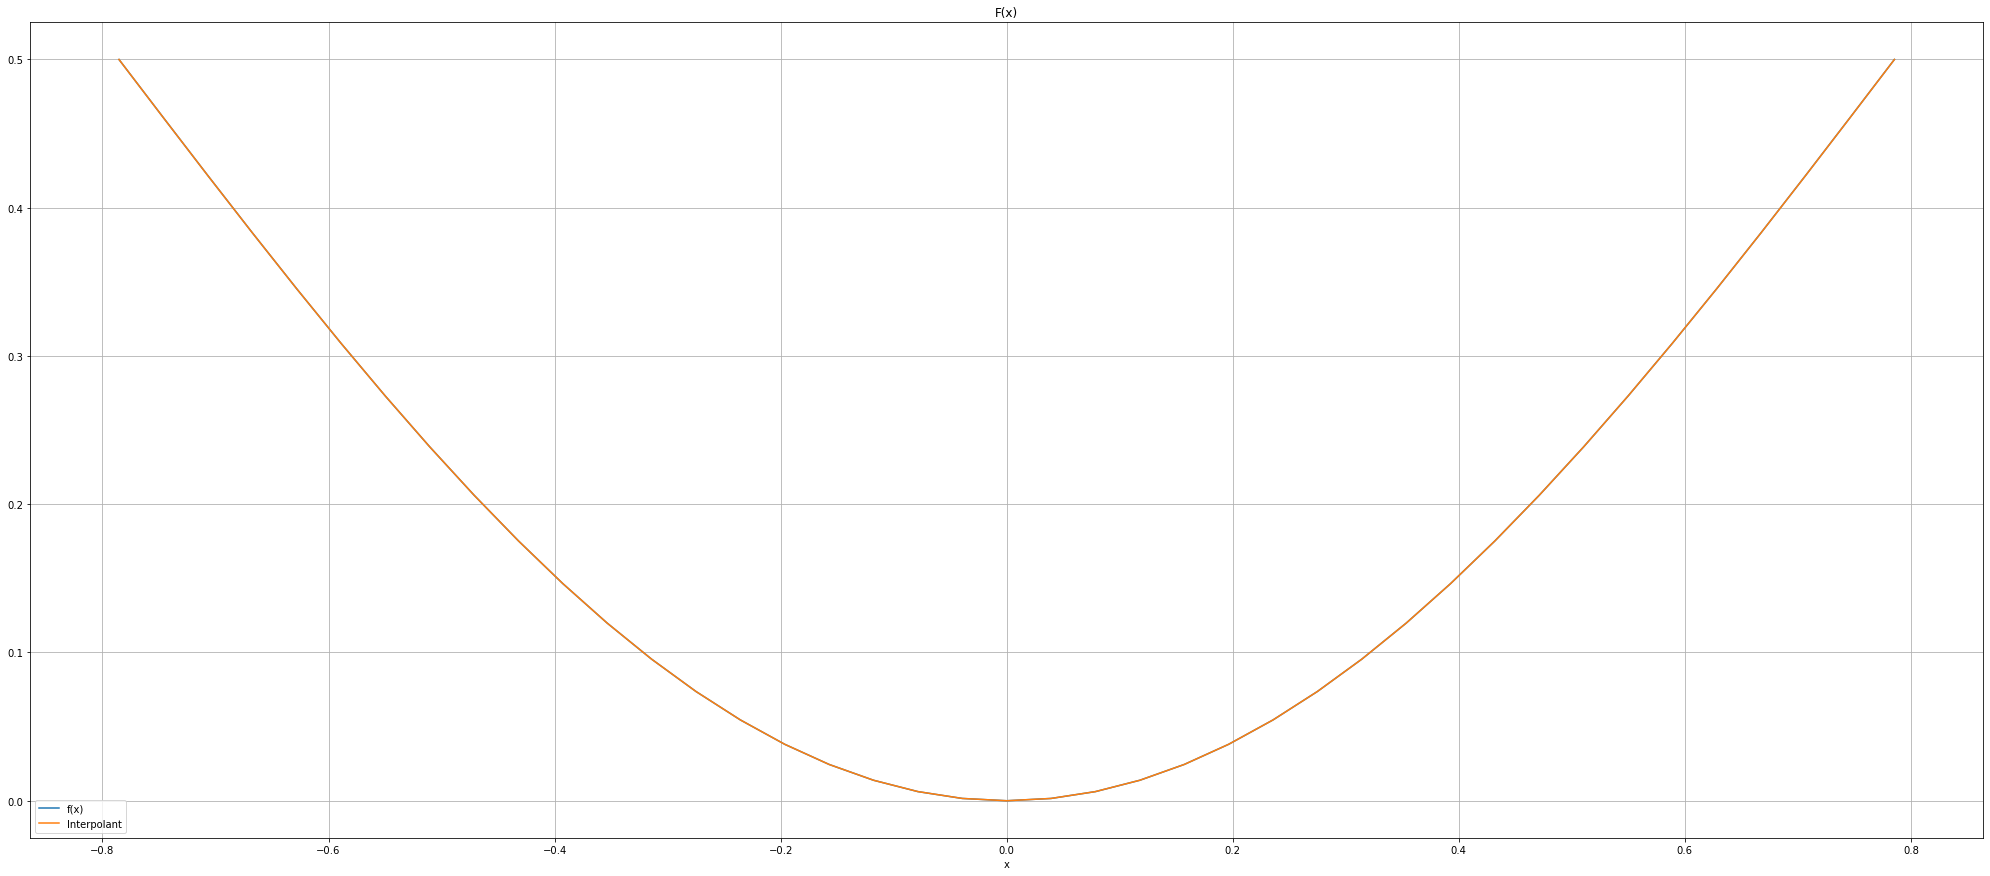

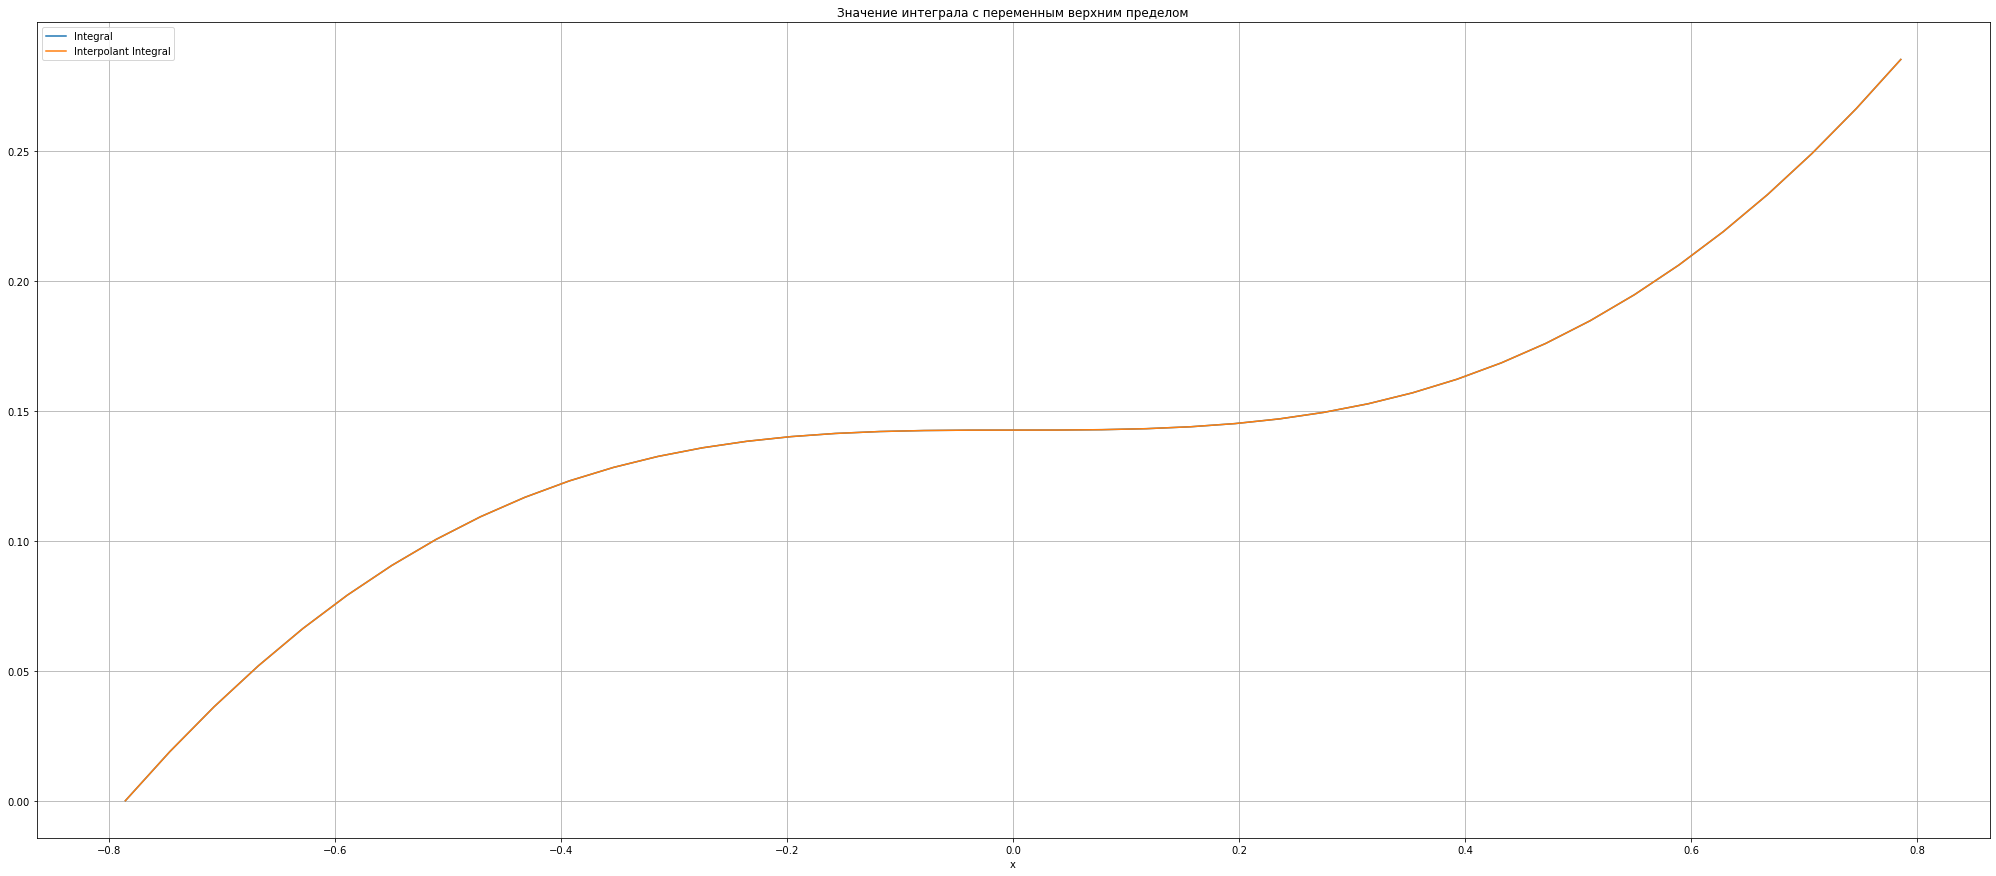

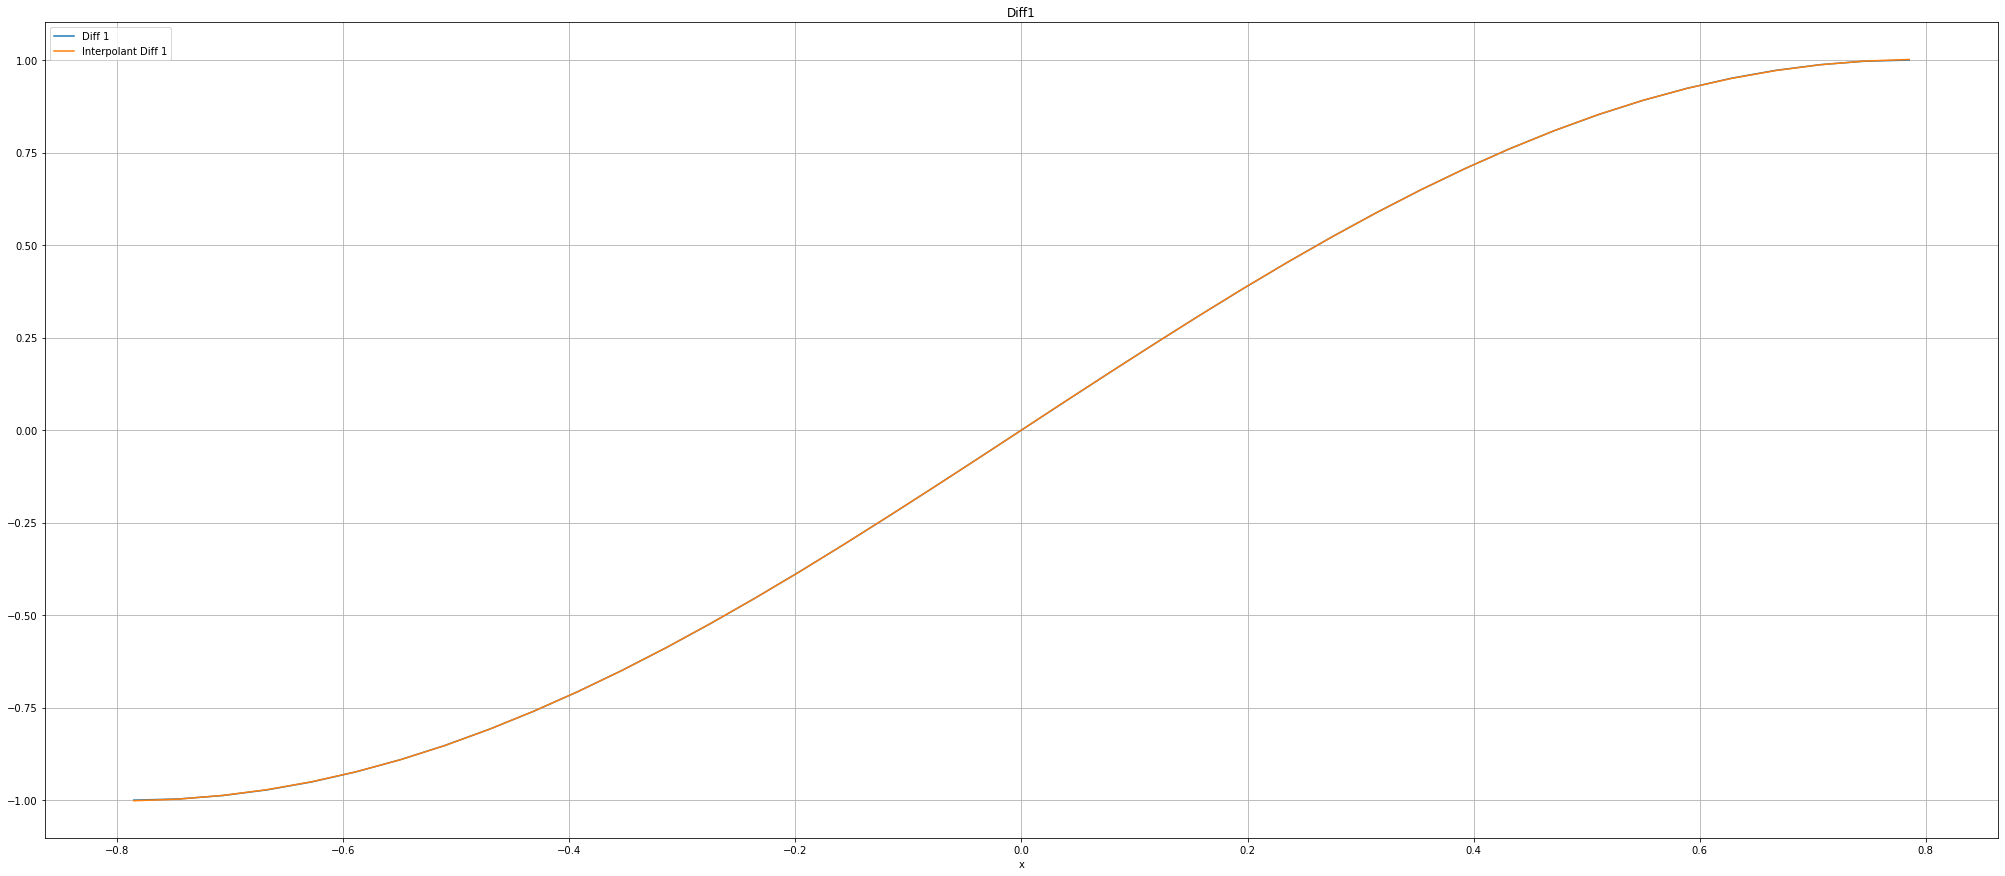

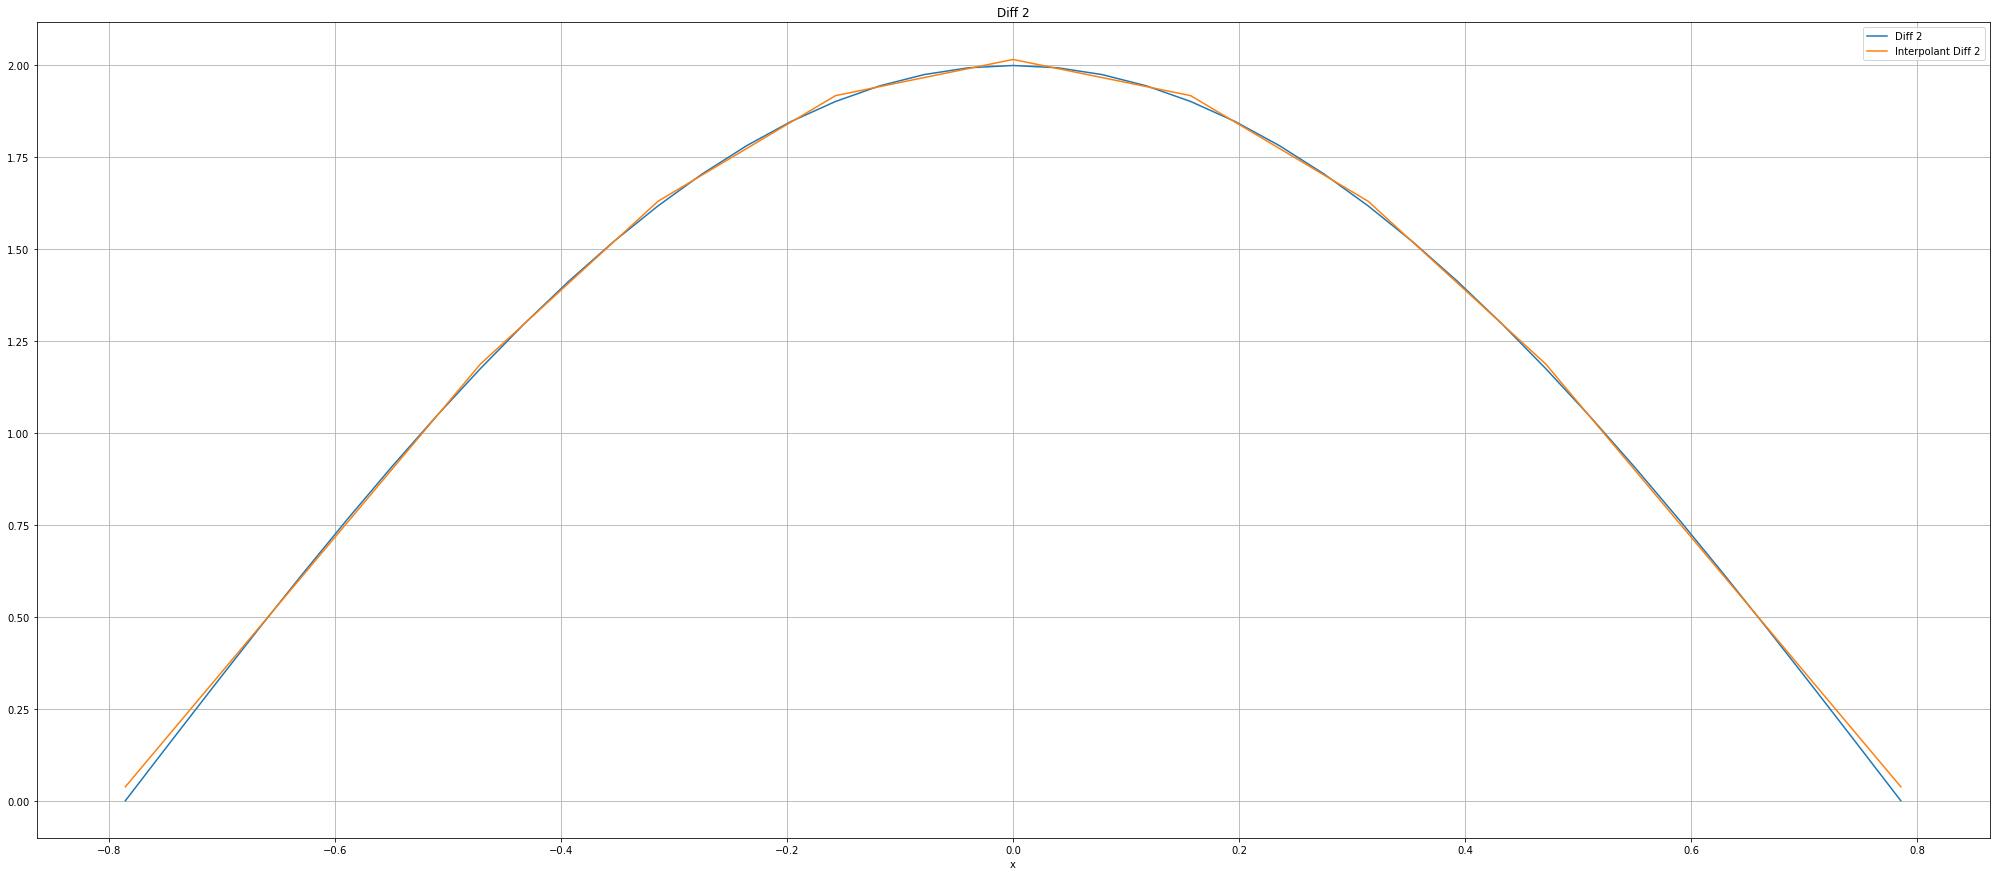

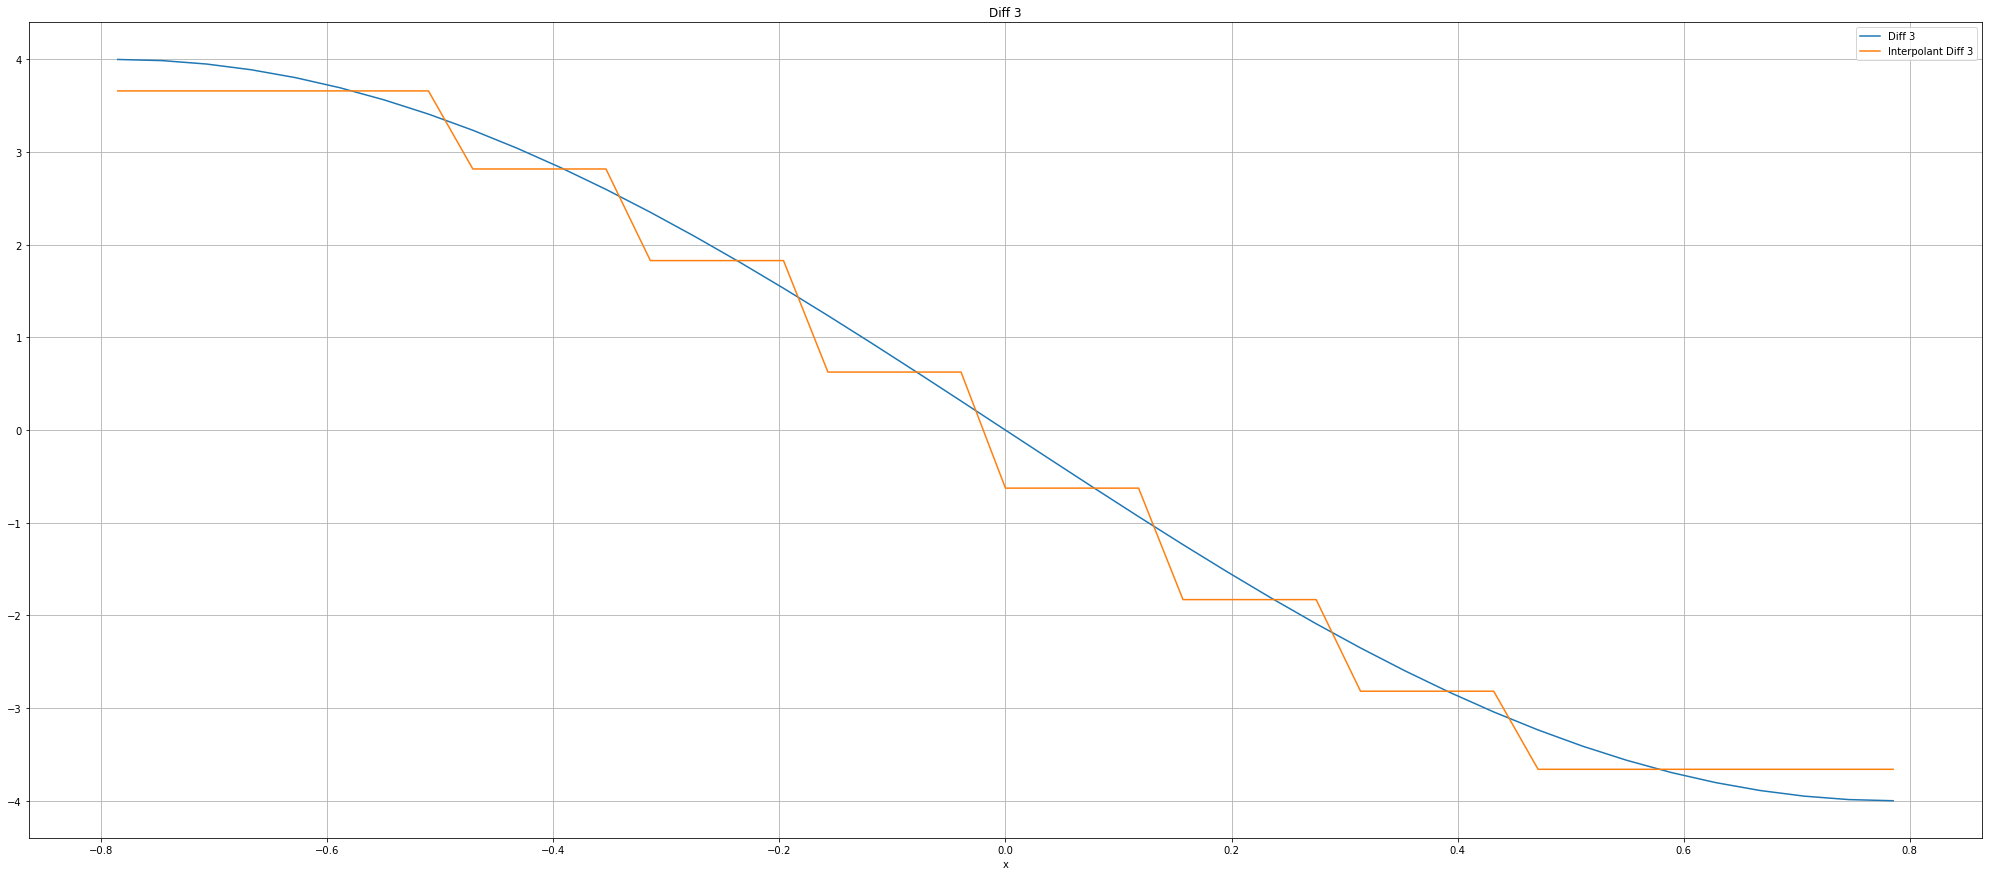

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  20



,x,f(x),Interpolant,error,Integral,Interpolant Integral,error,Diff 1,Interpolant Diff 1,error,Diff 2,Interpolant Diff 2,error,Diff 3,Interpolant Diff 3,error
0,-0.785398,0.500000,0.500000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000105e+00,1.054751e-04,4.440892e-16,0.004802,0.004802,4.000000,3.914249,0.085751
1,-0.765763,0.480370,0.480369,1.253187e-06,0.009625,0.009625,1.480367e-08,-0.999229,-9.992567e-01,2.762397e-05,7.851963e-02,0.081658,0.003138,3.996916,3.914249,0.082667
2,-0.746128,0.460770,0.460769,1.292606e-06,0.018864,0.018864,4.127862e-08,-0.996917,-9.968988e-01,1.855445e-05,1.569182e-01,0.158514,0.001596,3.987669,3.914249,0.073420
3,-0.726493,0.441231,0.441231,7.090403e-07,0.027720,0.027719,6.150712e-08,-0.993068,-9.930318e-01,3.662466e-05,2.350748e-01,0.235370,0.000295,3.972274,3.914249,0.058025
4,-0.706858,0.421783,0.421783,0.000000e+00,0.036192,0.036192,6.833183e-08,-0.987688,-9.876558e-01,3.252135e-05,3.128689e-01,0.312226,0.000643,3.950753,3.914249,0.036504
5,-0.687223,0.402455,0.402455,4.767278e-07,0.044284,0.044284,6.306818e-08,-0.980785,-9.807707e-01,1.454026e-05,3.901806e-01,0.389082,0.001098,3.923141,3.914249,0.008892
6,-0.667588,0.383277,0.383278,5.493212e-07,0.051997,0.051997,5.230644e-08,-0.972370,-9.723766e-01,6.674567e-06,4.668907e-01,0.465938,0.000952,3.889480,3.914249,0.024770
7,-0.647953,0.364280,0.364280,2.778758e-07,0.059336,0.059336,4.380867e-08,-0.962455,-9.624734e-01,1.814728e-05,5.428809e-01,0.542794,0.000086,3.849821,3.914249,0.064428
8,-0.628319,0.345492,0.345492,0.000000e+00,0.066304,0.066304,4.150678e-08,-0.951057,-9.510611e-01,4.590136e-06,6.180340e-01,0.619651,0.001617,3.804226,3.693751,0.110475
9,-0.608684,0.326941,0.326942,9.779197e-08,0.072905,0.072905,4.097490e-08,-0.938191,-9.381823e-01,9.068432e-06,6.922341e-01,0.692177,0.000057,3.752765,3.693751,0.059014



Max_errors:	
Integral:	6.83318330668703e-08	
Function:	1.2926063582829883e-06	
Diff 1:	0.00010547507179747839	
Diff 2:	0.004801734231043742	
Diff 3:	0.3141596979693306



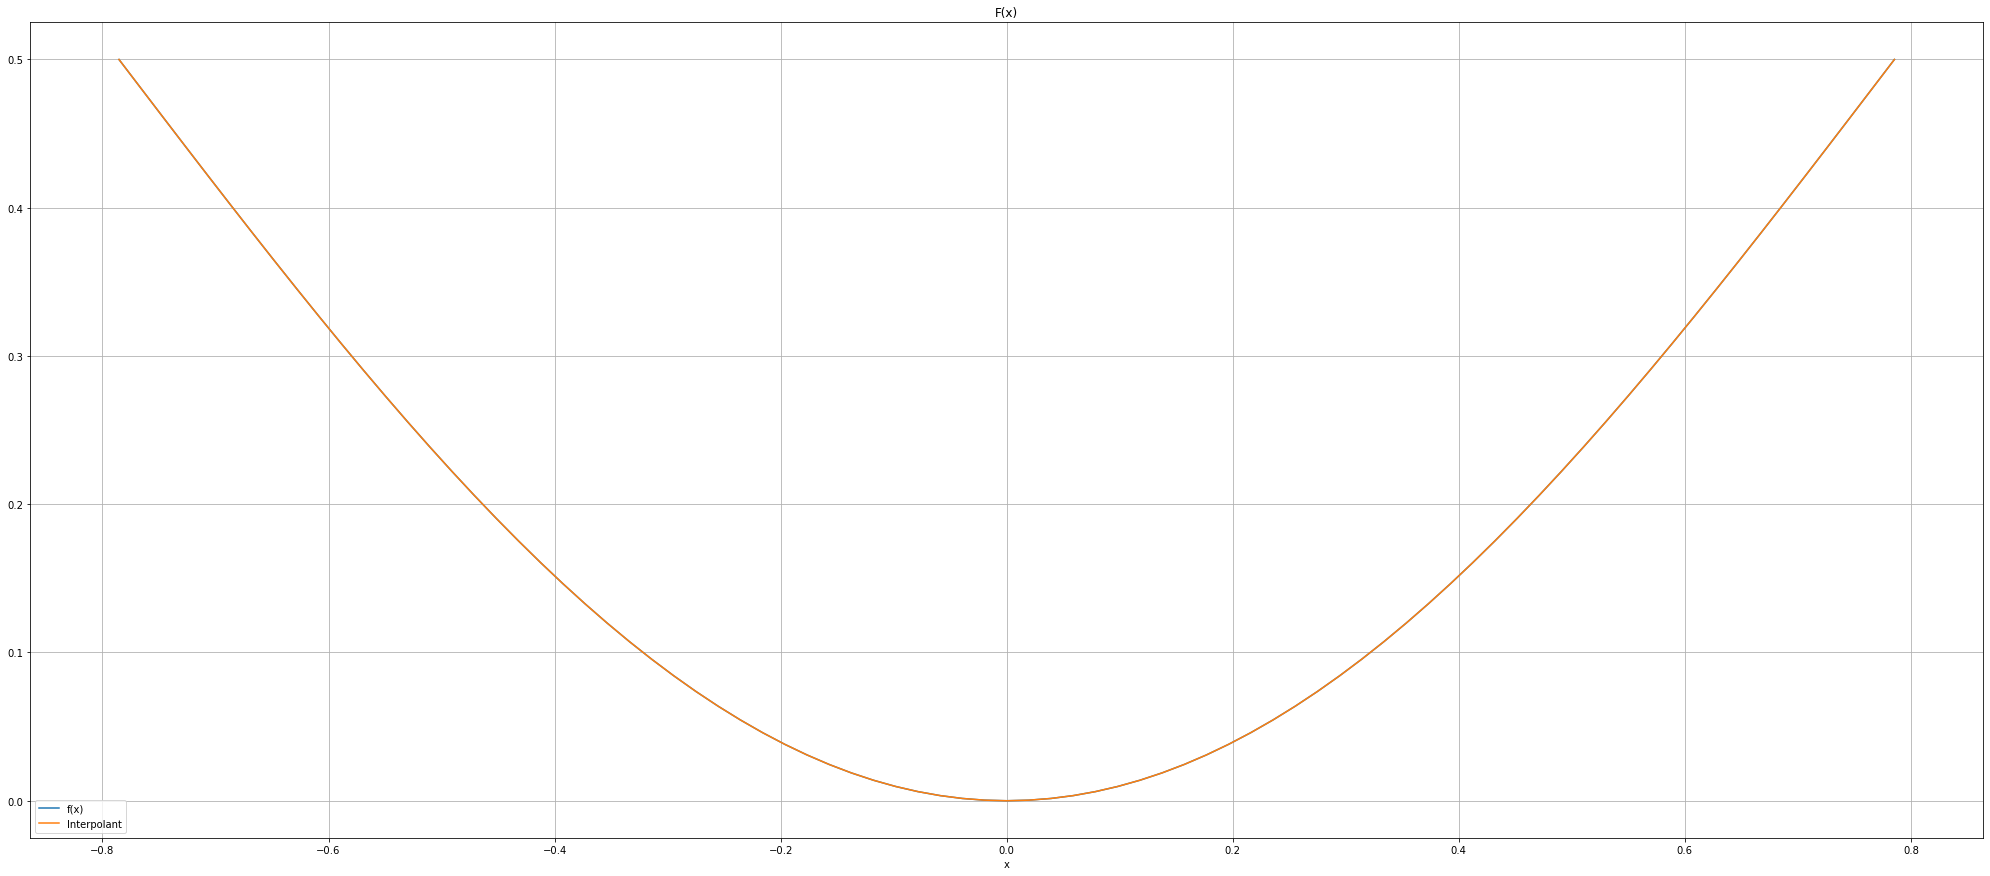

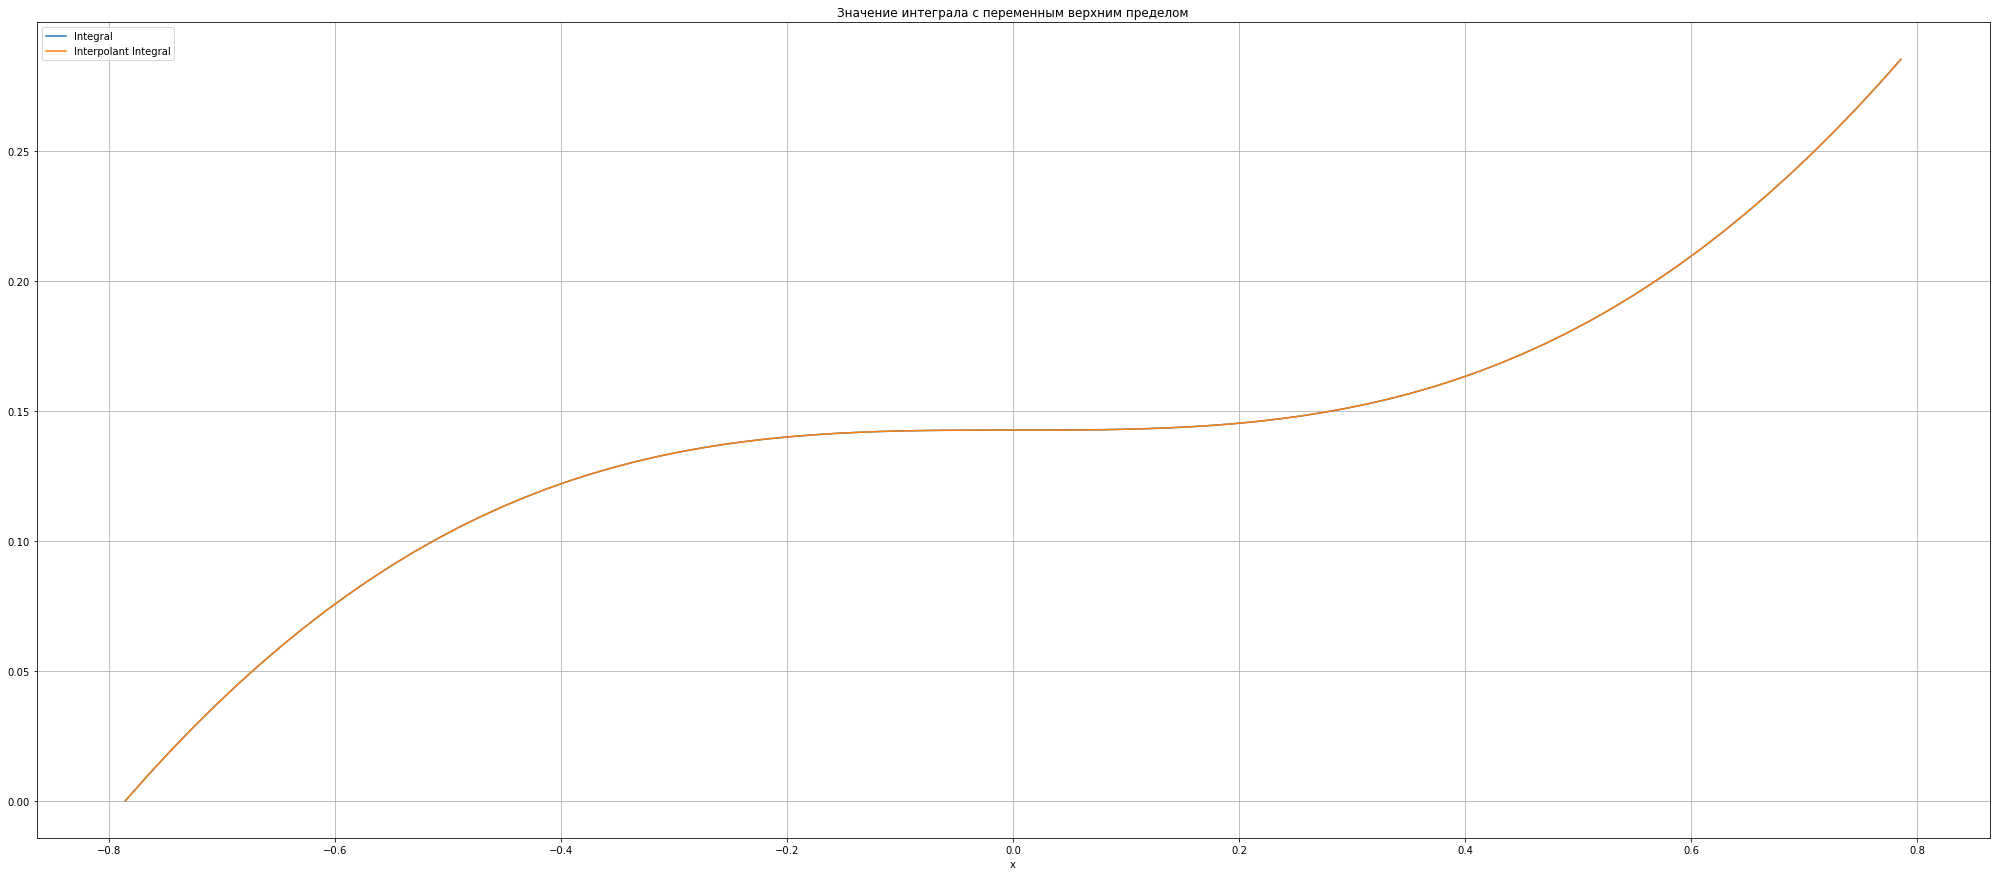

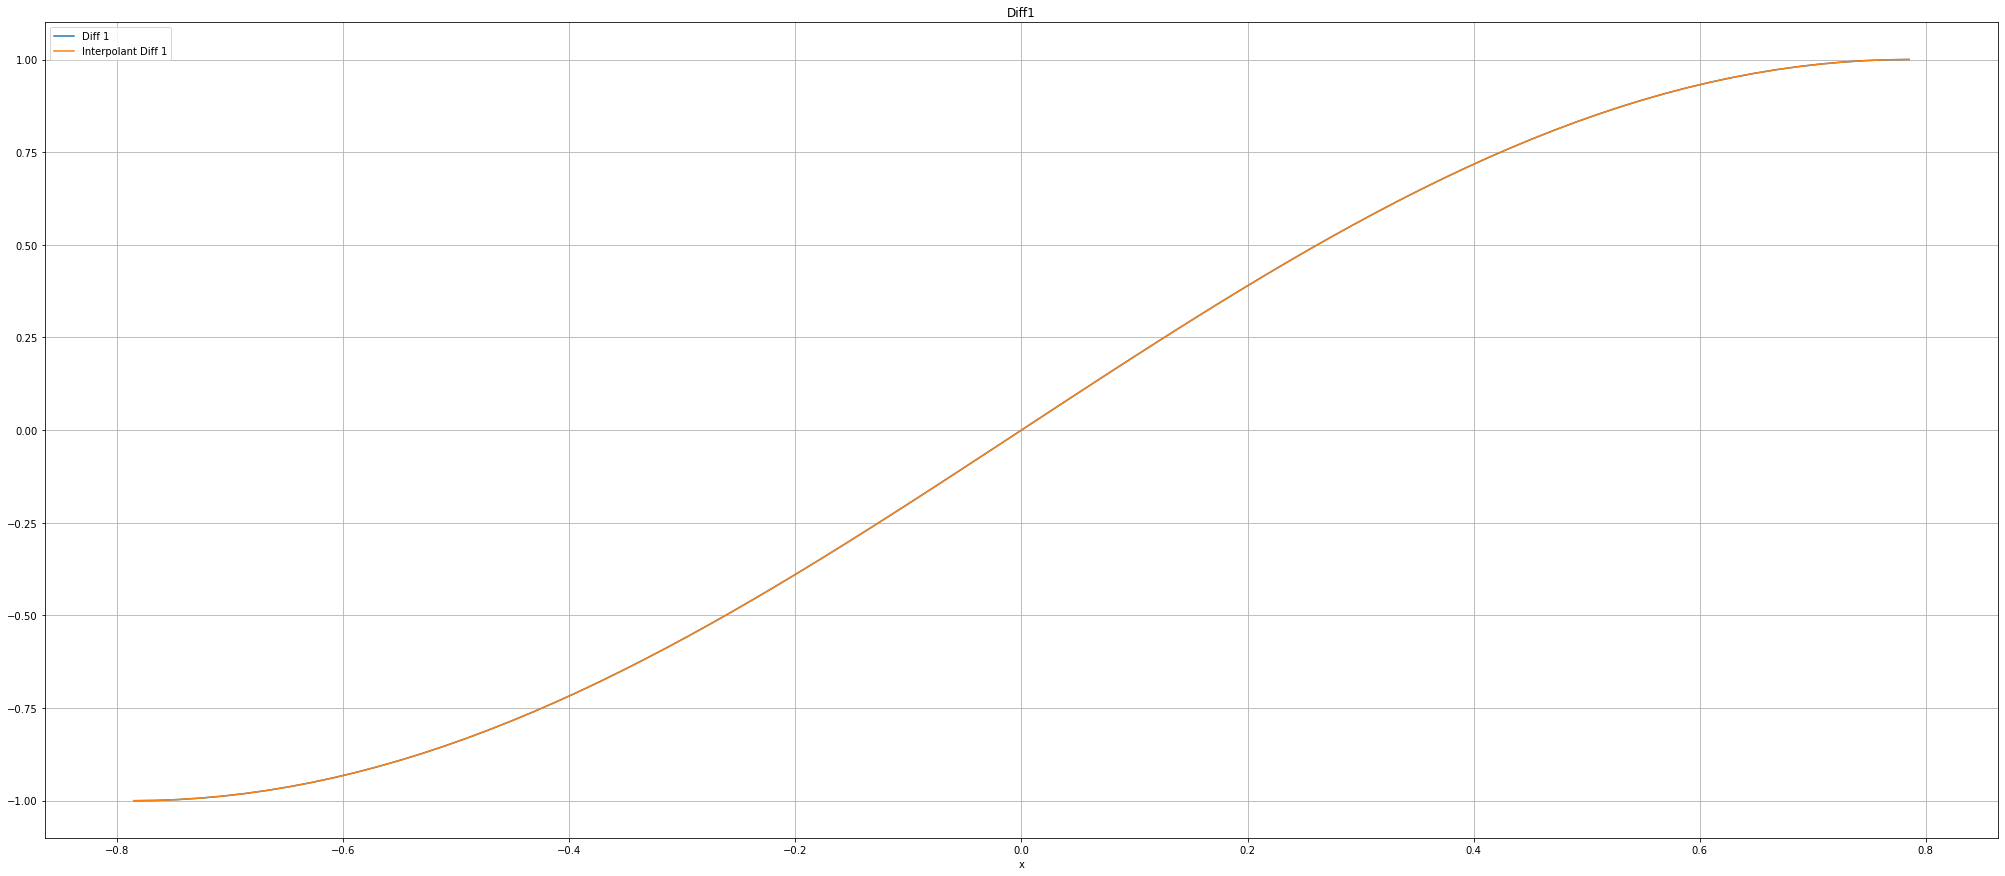

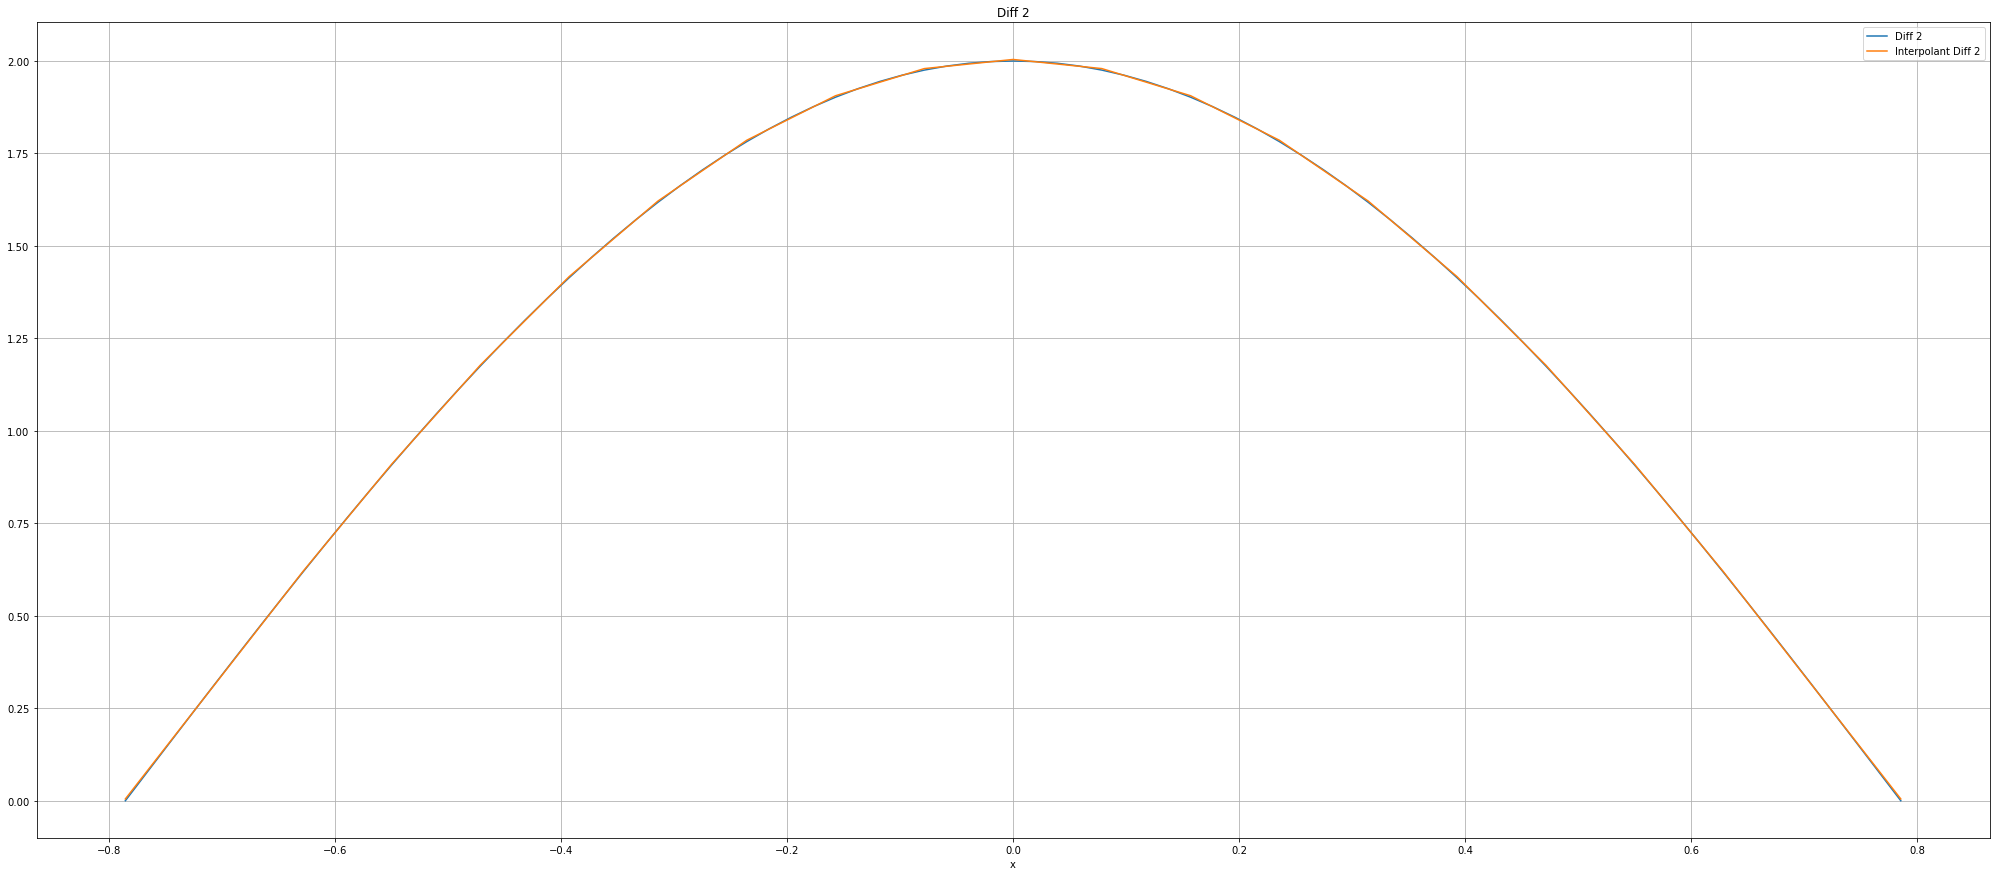

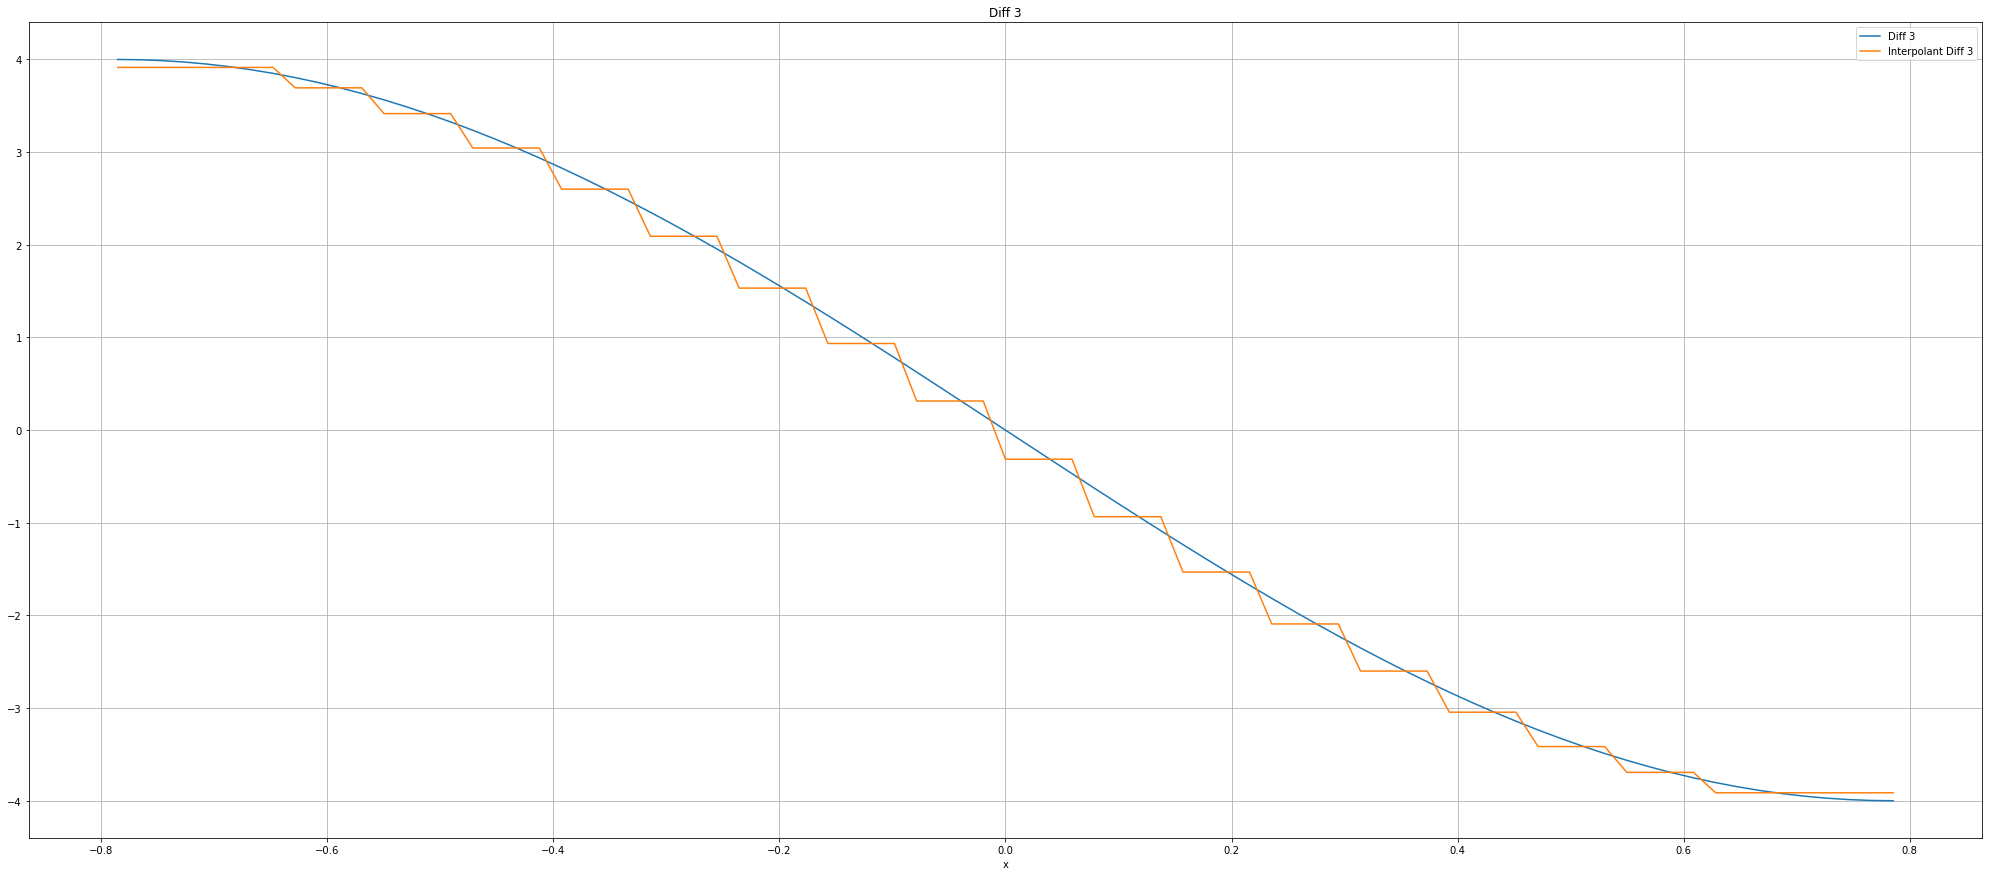

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  40



,x,f(x),Interpolant,error,Integral,Interpolant Integral,error,Diff 1,Interpolant Diff 1,error,Diff 2,Interpolant Diff 2,error,Diff 3,Interpolant Diff 3,error
0,-0.785398,0.500000,0.500000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000007,6.613704e-06,4.440892e-16,0.000602,0.000602,4.000000,3.978504,0.021496
1,-0.775581,0.490183,0.490183,3.929307e-08,0.004861,0.004861,2.320739e-10,-0.999807,-0.999809,1.732611e-06,3.926738e-02,0.039661,0.000394,3.999229,3.978504,0.020725
2,-0.765763,0.480370,0.480370,4.053245e-08,0.009625,0.009625,6.471463e-10,-0.999229,-0.999228,1.163298e-06,7.851963e-02,0.078720,0.000200,3.996916,3.978504,0.018413
3,-0.755946,0.470565,0.470565,2.223498e-08,0.014293,0.014293,9.643108e-10,-0.998266,-0.998263,2.296934e-06,1.177416e-01,0.117779,0.000037,3.993062,3.978504,0.014559
4,-0.746128,0.460770,0.460770,0.000000e+00,0.018864,0.018864,1.071321e-09,-0.996917,-0.996915,2.039715e-06,1.569182e-01,0.156838,0.000081,3.987669,3.978504,0.009166
5,-0.736311,0.450991,0.450991,1.494799e-08,0.023340,0.023340,9.887934e-10,-0.995185,-0.995184,9.114266e-07,1.960343e-01,0.195896,0.000138,3.980739,3.978504,0.002235
6,-0.726493,0.441231,0.441231,1.721499e-08,0.027720,0.027720,8.201108e-10,-0.993068,-0.993069,4.199774e-07,2.350748e-01,0.234955,0.000120,3.972274,3.978504,0.006230
7,-0.716676,0.431494,0.431494,8.690866e-09,0.032004,0.032004,6.870445e-10,-0.990569,-0.990570,1.138635e-06,2.740247e-01,0.274014,0.000011,3.962277,3.978504,0.016226
8,-0.706858,0.421783,0.421783,0.000000e+00,0.036192,0.036192,6.511224e-10,-0.987688,-0.987689,2.810889e-07,3.128689e-01,0.313073,0.000204,3.950753,3.922754,0.028000
9,-0.697041,0.412102,0.412102,3.156390e-09,0.040285,0.040285,6.423496e-10,-0.984427,-0.984426,5.766726e-07,3.515926e-01,0.351585,0.000008,3.937706,3.922754,0.014953



Max_errors:	
Integral:	1.0713209139256996e-09	
Function:	4.9583013029847346e-08	
Diff 1:	6.613703929181369e-06	
Diff 2:	0.0010282950509341582	
Diff 3:	0.15707962436630055



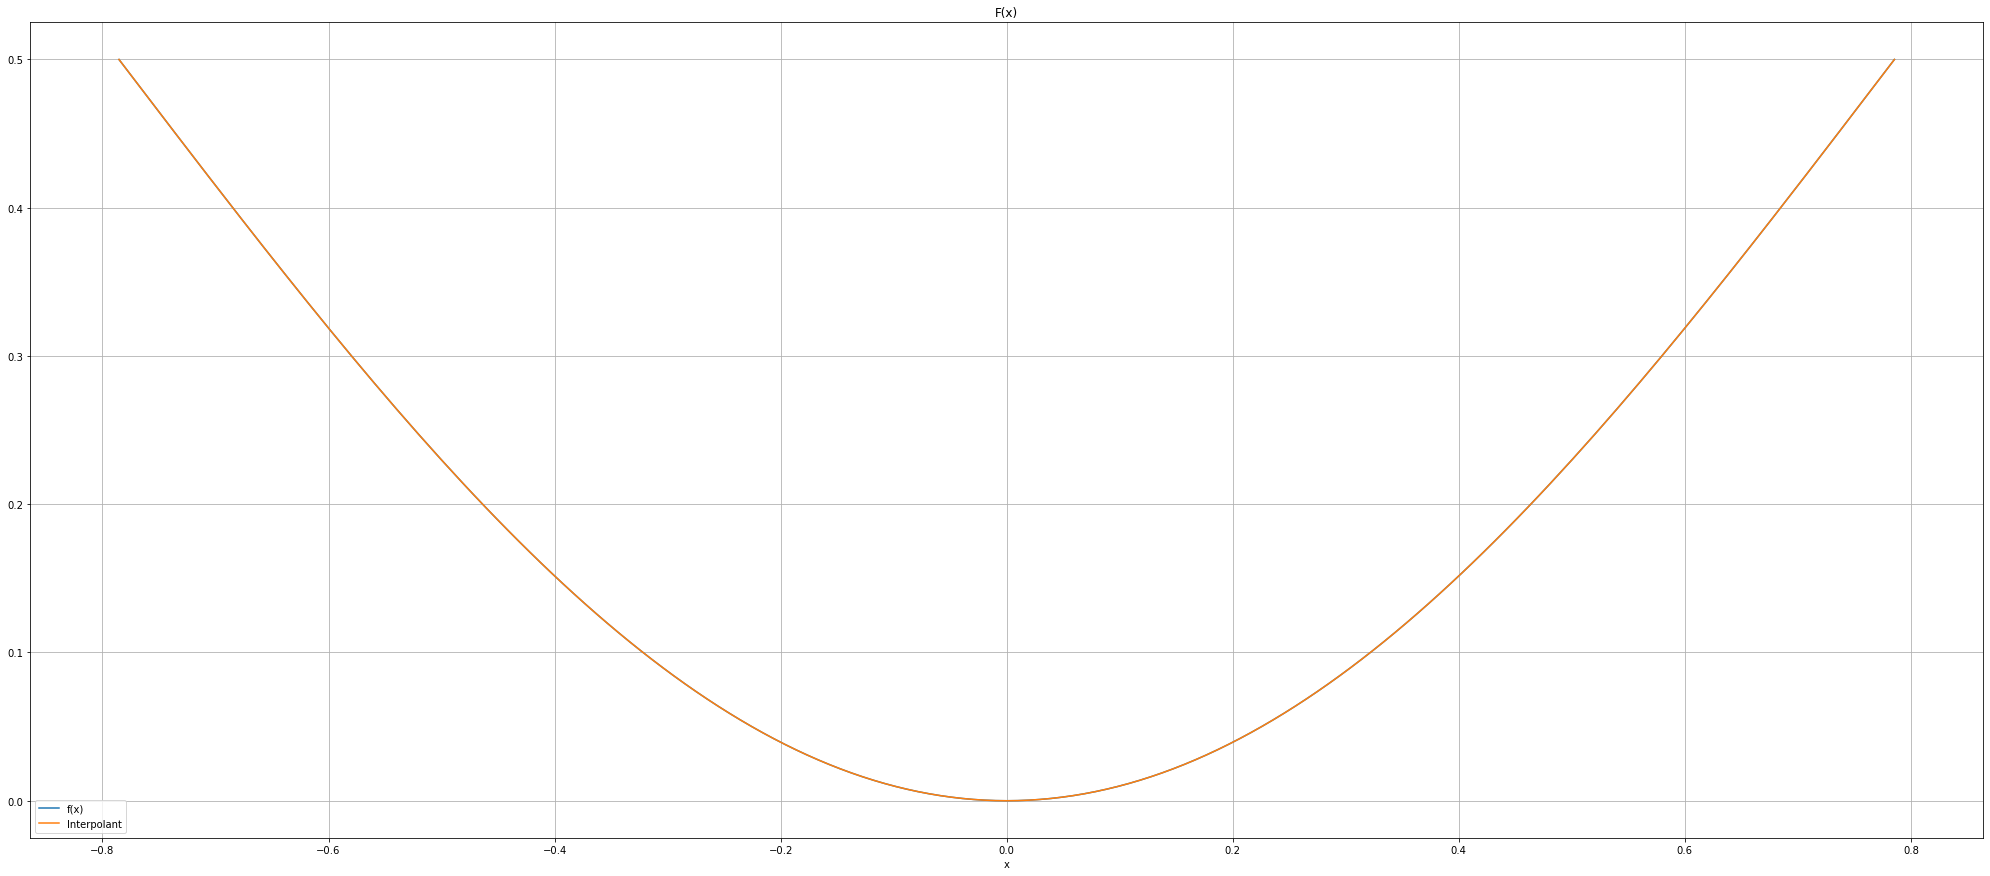

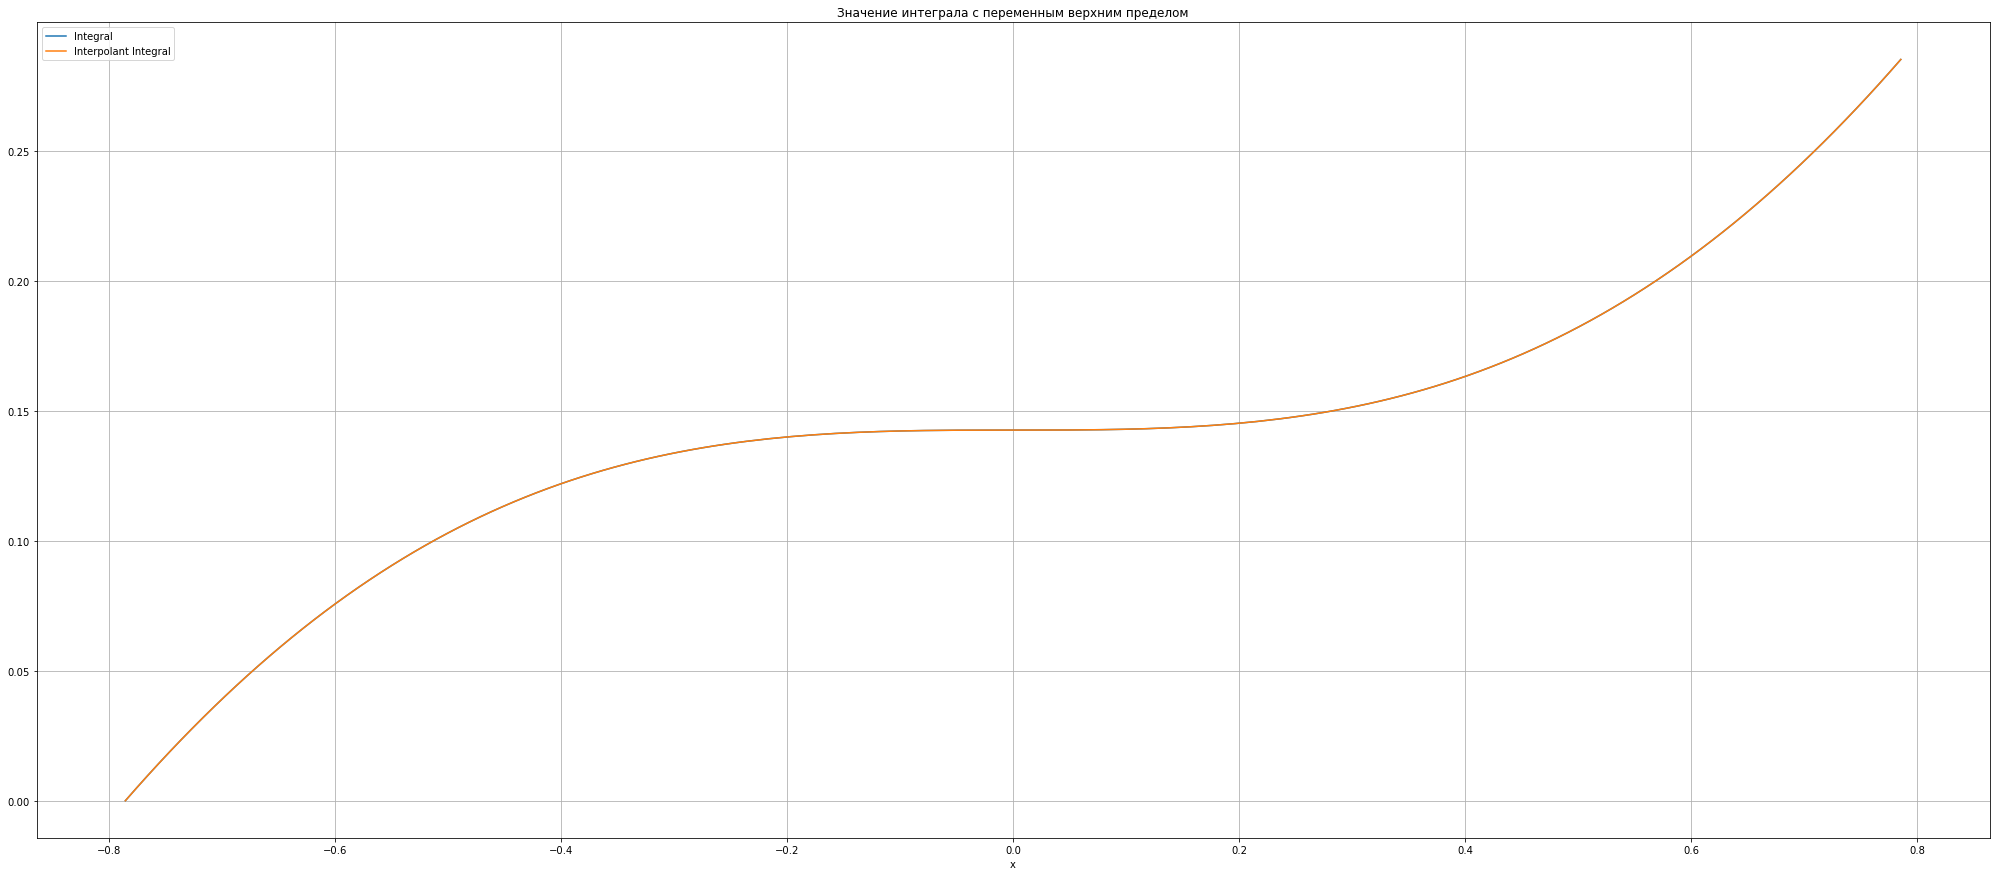

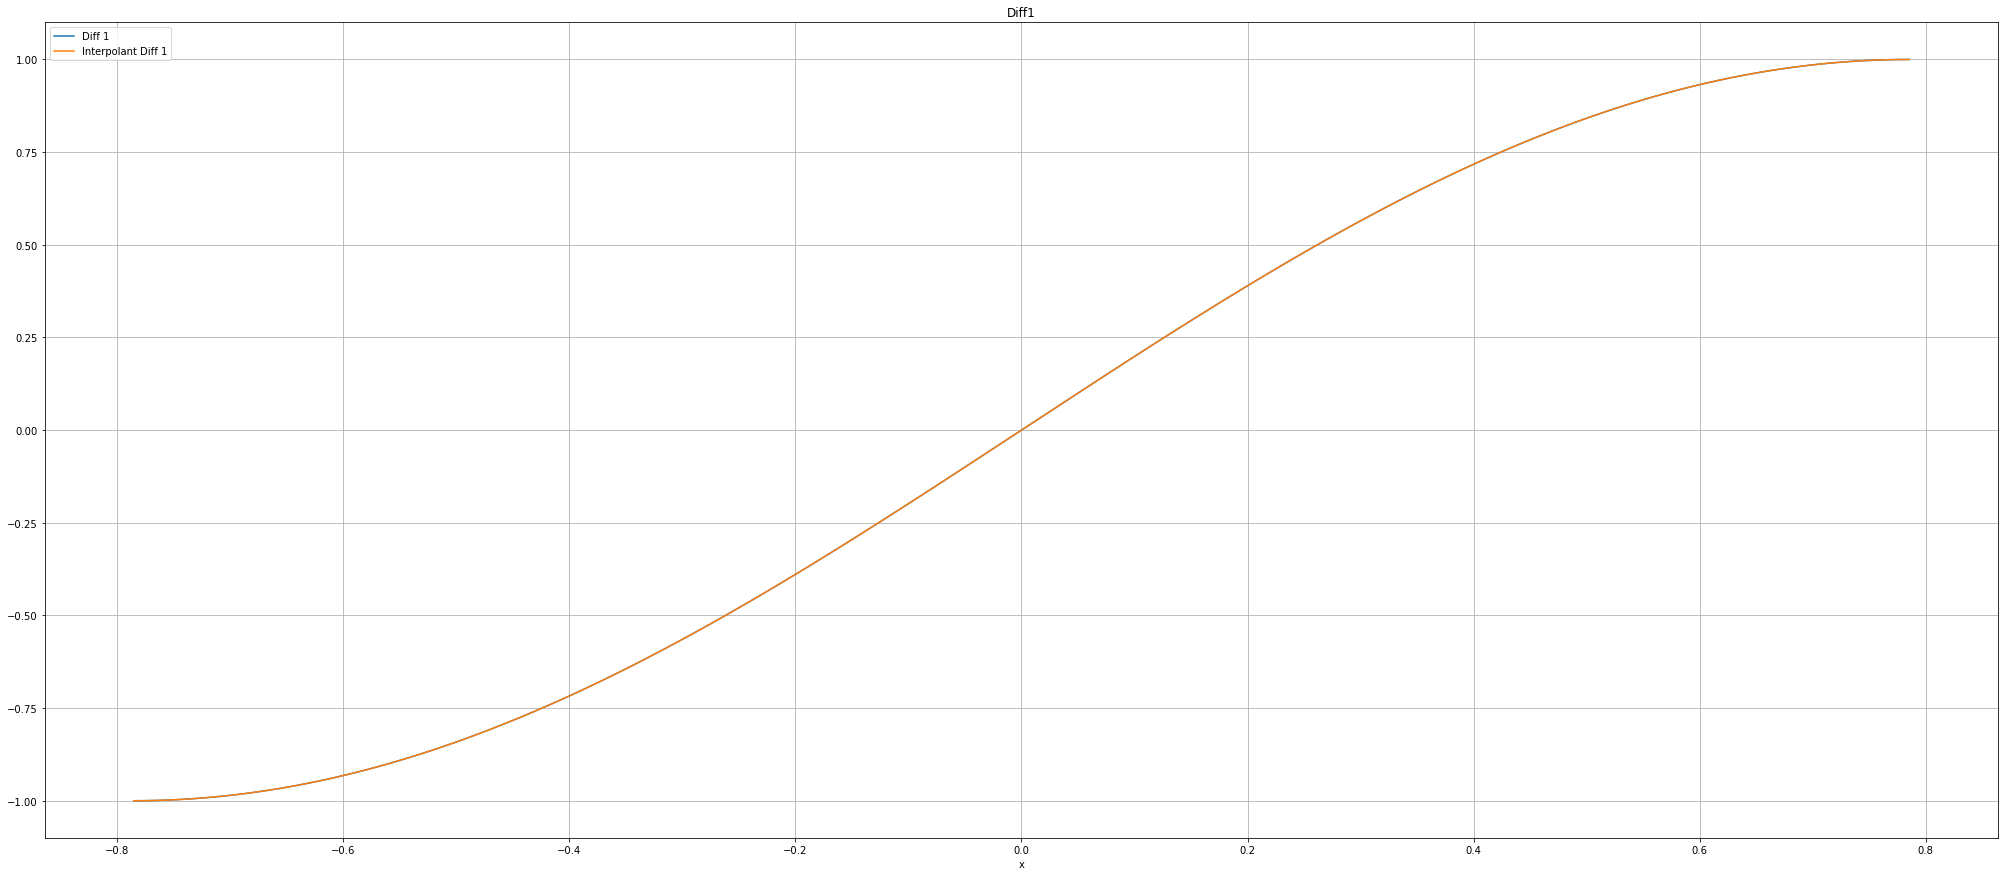

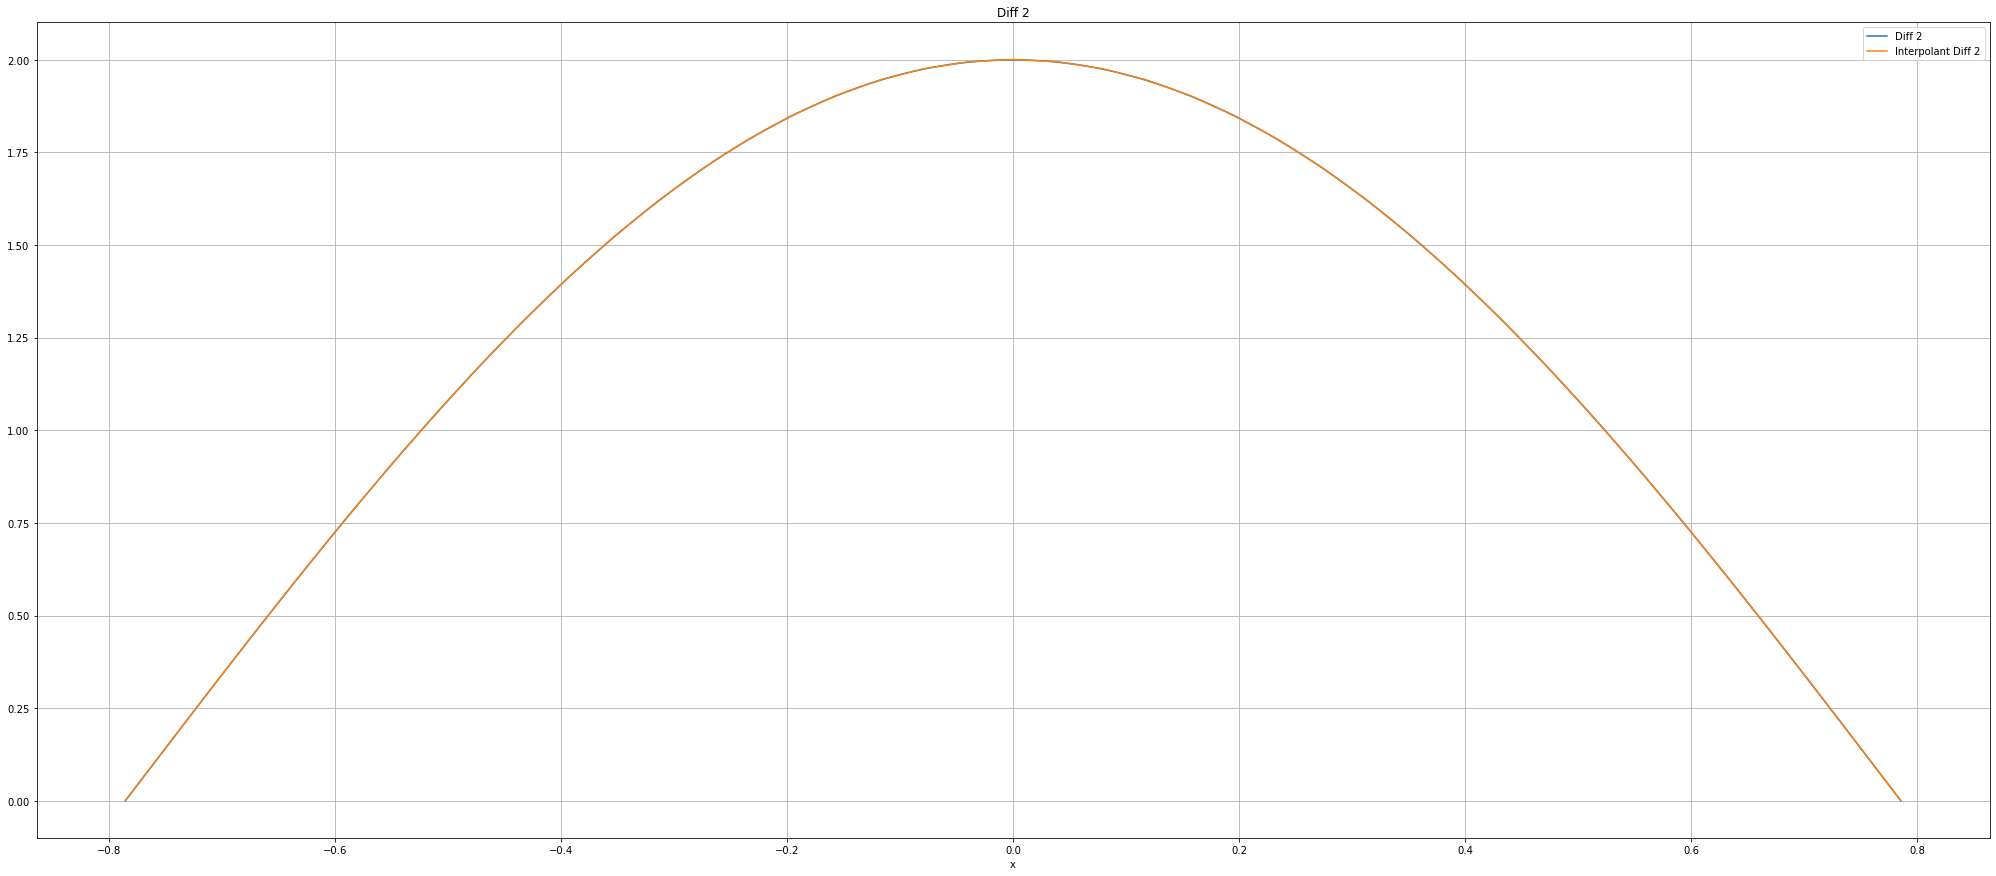

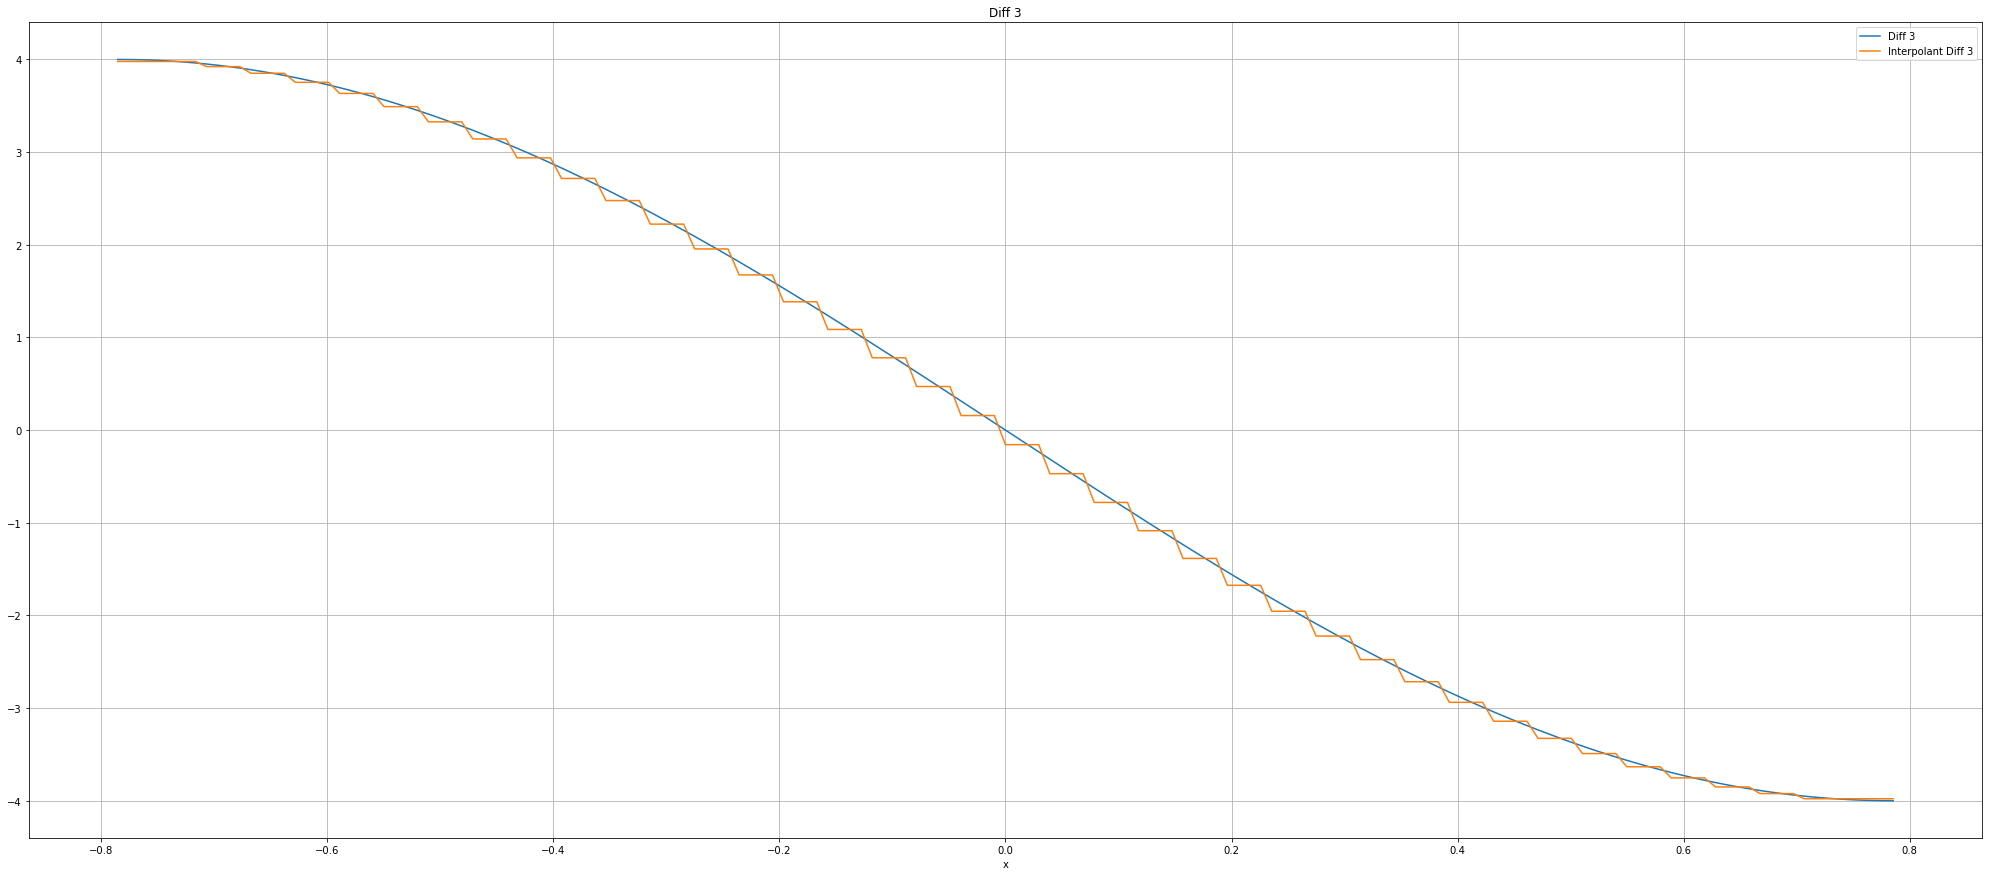

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  80



,x,f(x),Interpolant,error,Integral,Interpolant Integral,error,Diff 1,Interpolant Diff 1,error,Diff 2,Interpolant Diff 2,error,Diff 3,Interpolant Diff 3,error
0,-0.785398,0.500000,0.500000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,4.136929e-07,4.440892e-16,0.000075,0.000075,4.000000,3.994622,0.005378
1,-0.780489,0.495091,0.495091,1.228933e-09,0.002442,0.002442,3.629150e-12,-0.999952,-9.999519e-01,1.083838e-07,1.963464e-02,0.019684,0.000049,3.999807,3.994622,0.005185
2,-0.775581,0.490183,0.490183,1.267722e-09,0.004861,0.004861,1.012013e-11,-0.999807,-9.998072e-01,7.276318e-08,3.926738e-02,0.039292,0.000025,3.999229,3.994622,0.004607
3,-0.770672,0.485276,0.485276,6.954489e-10,0.007255,0.007255,1.508010e-11,-0.999566,-9.995662e-01,1.436818e-07,5.889635e-02,0.058901,0.000005,3.998265,3.994622,0.003643
4,-0.765763,0.480370,0.480370,0.000000e+00,0.009625,0.009625,1.675360e-11,-0.999229,-9.992289e-01,1.275937e-07,7.851963e-02,0.078510,0.000010,3.996916,3.994622,0.002294
5,-0.760854,0.475466,0.475466,4.675176e-10,0.011971,0.011971,1.546301e-11,-0.998795,-9.987954e-01,5.700569e-08,9.813535e-02,0.098118,0.000017,3.995182,3.994622,0.000560
6,-0.755946,0.470565,0.470565,5.383484e-10,0.014293,0.014293,1.282528e-11,-0.998266,-9.982656e-01,2.629274e-08,1.177416e-01,0.117727,0.000015,3.993062,3.994622,0.001560
7,-0.751037,0.465666,0.465666,2.716452e-10,0.016590,0.016590,1.074499e-11,-0.997640,-9.976396e-01,7.123396e-08,1.373365e-01,0.137335,0.000001,3.990558,3.994622,0.004064
8,-0.746128,0.460770,0.460770,0.000000e+00,0.018864,0.018864,1.018388e-11,-0.996917,-9.969174e-01,1.747692e-08,1.569182e-01,0.156944,0.000026,3.987669,3.980645,0.007024
9,-0.741220,0.455879,0.455879,9.942508e-11,0.021114,0.021114,1.004499e-11,-0.996099,-9.960990e-01,3.619718e-08,1.764847e-01,0.176484,0.000001,3.984396,3.980645,0.003751



Max_errors:	
Integral:	1.6753596773777524e-11	
Function:	3.0971484608861366e-09	
Diff 1:	4.731823224964765e-07	
Diff 2:	0.0002570341578347346	
Diff 3:	0.07853981608003405



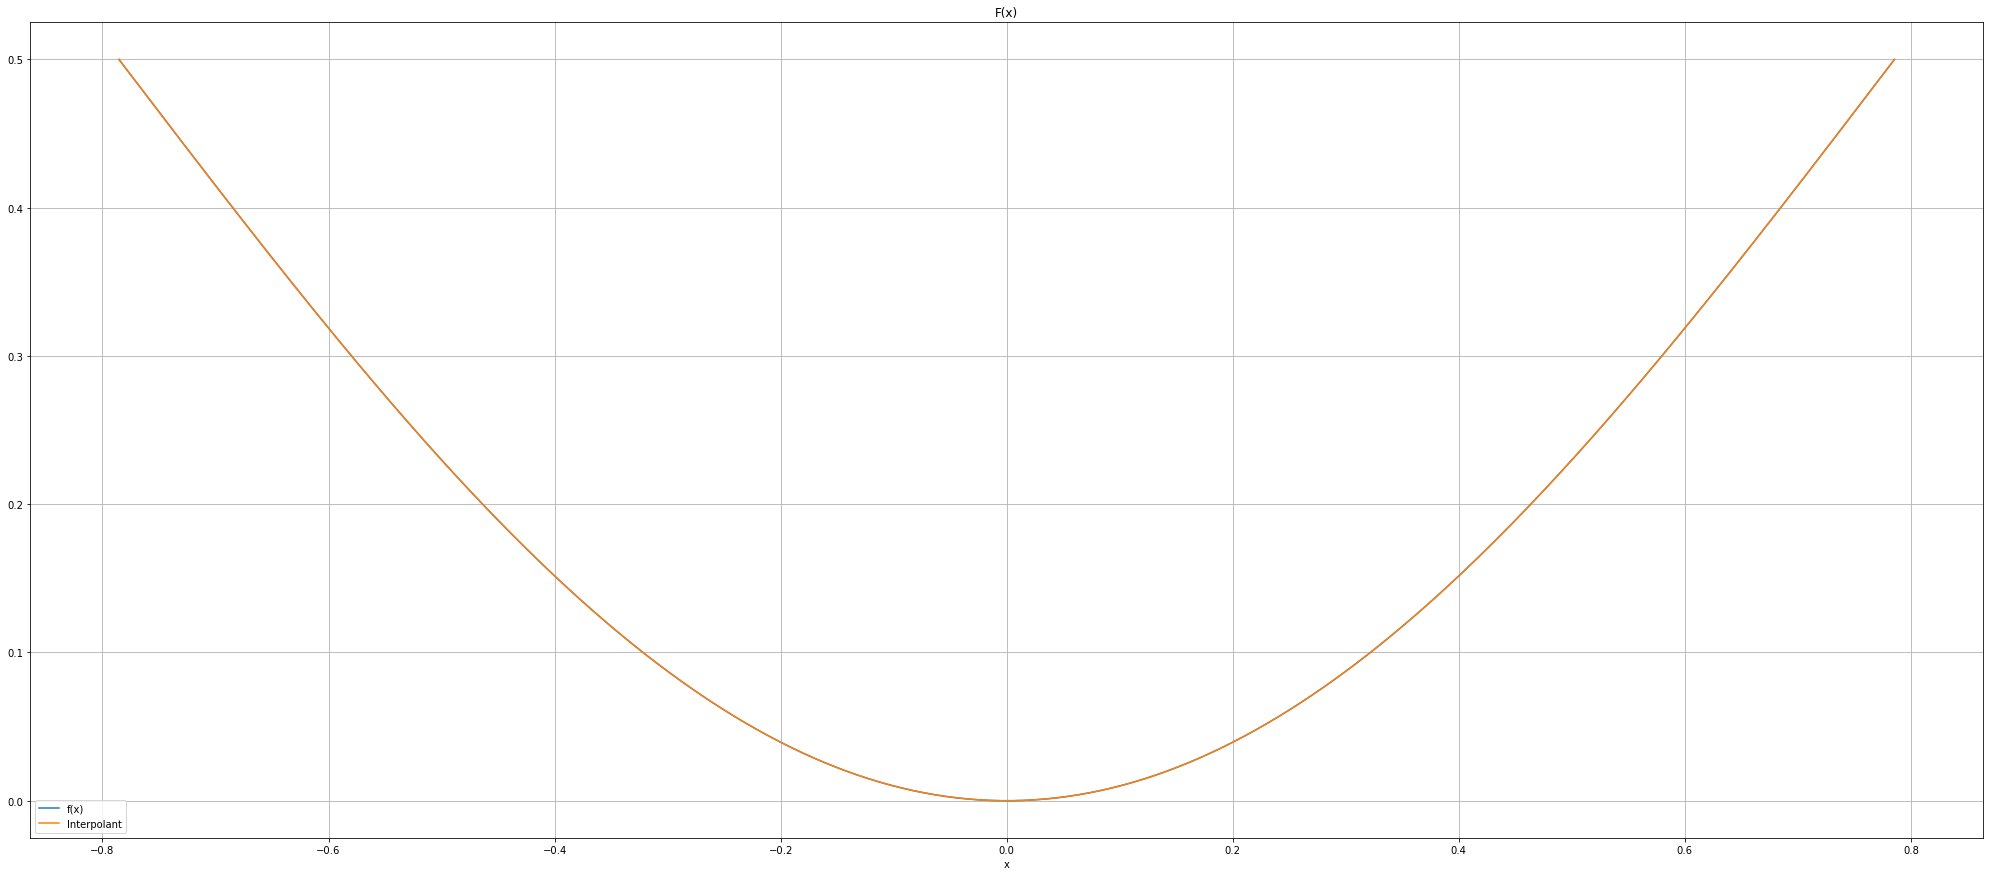

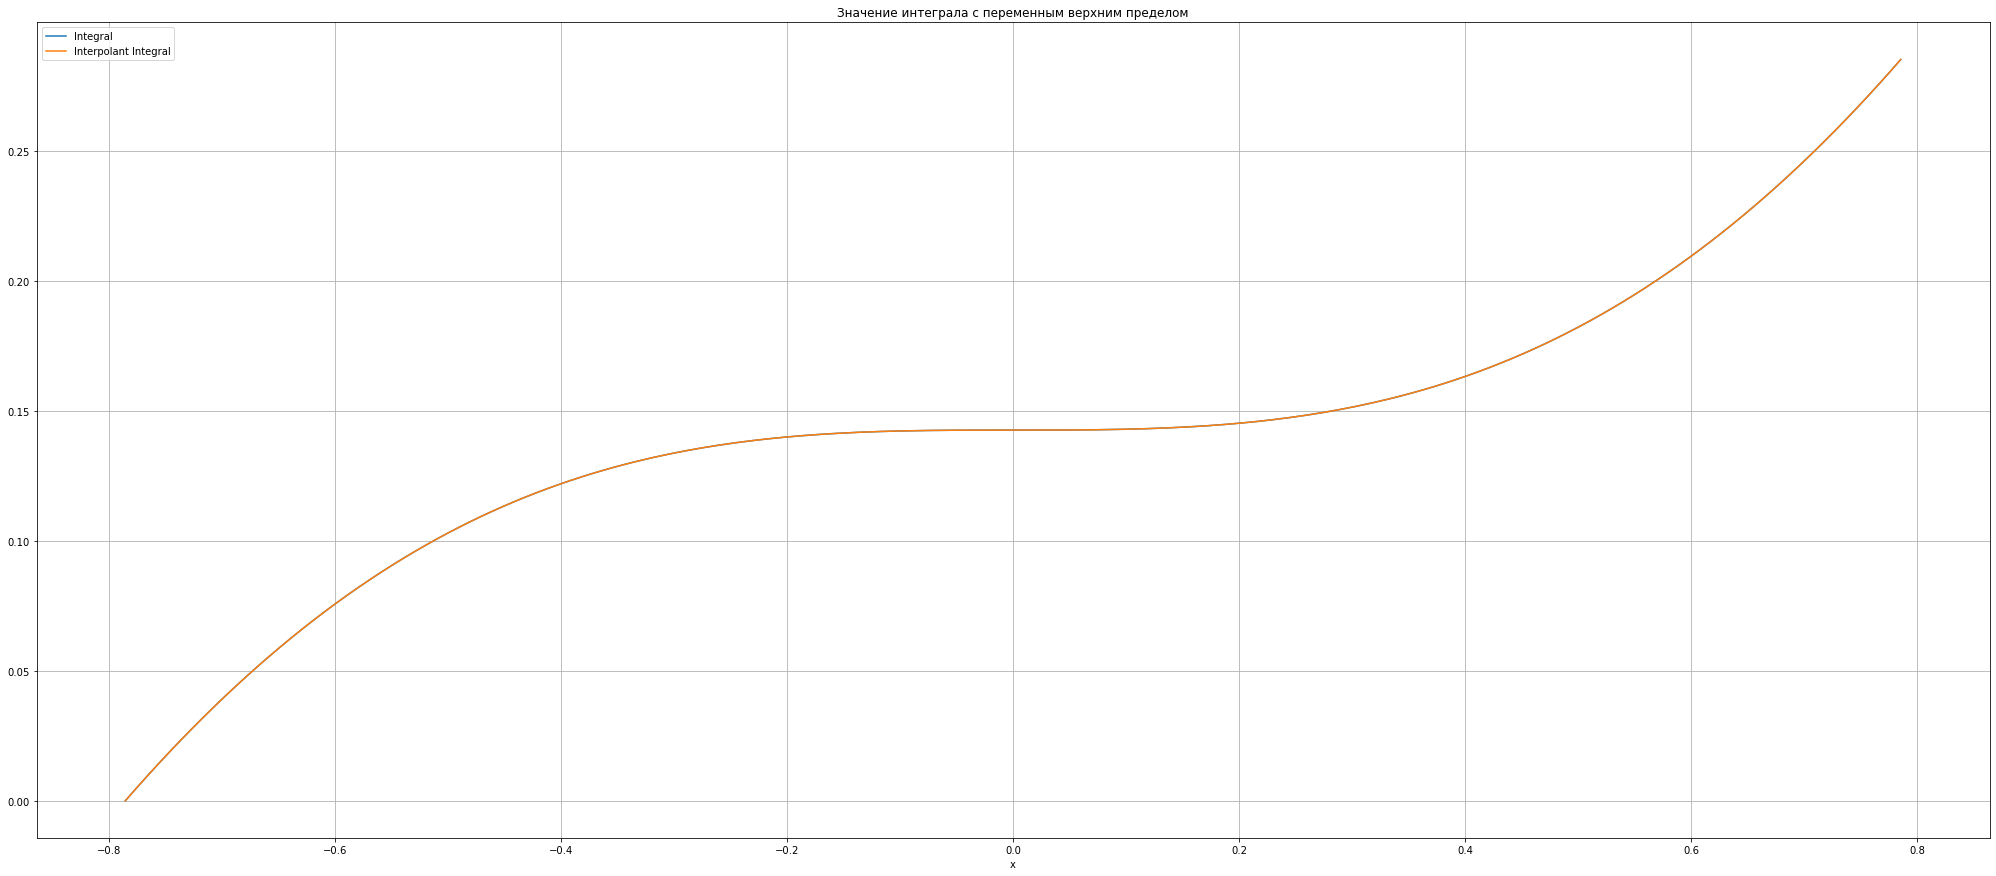

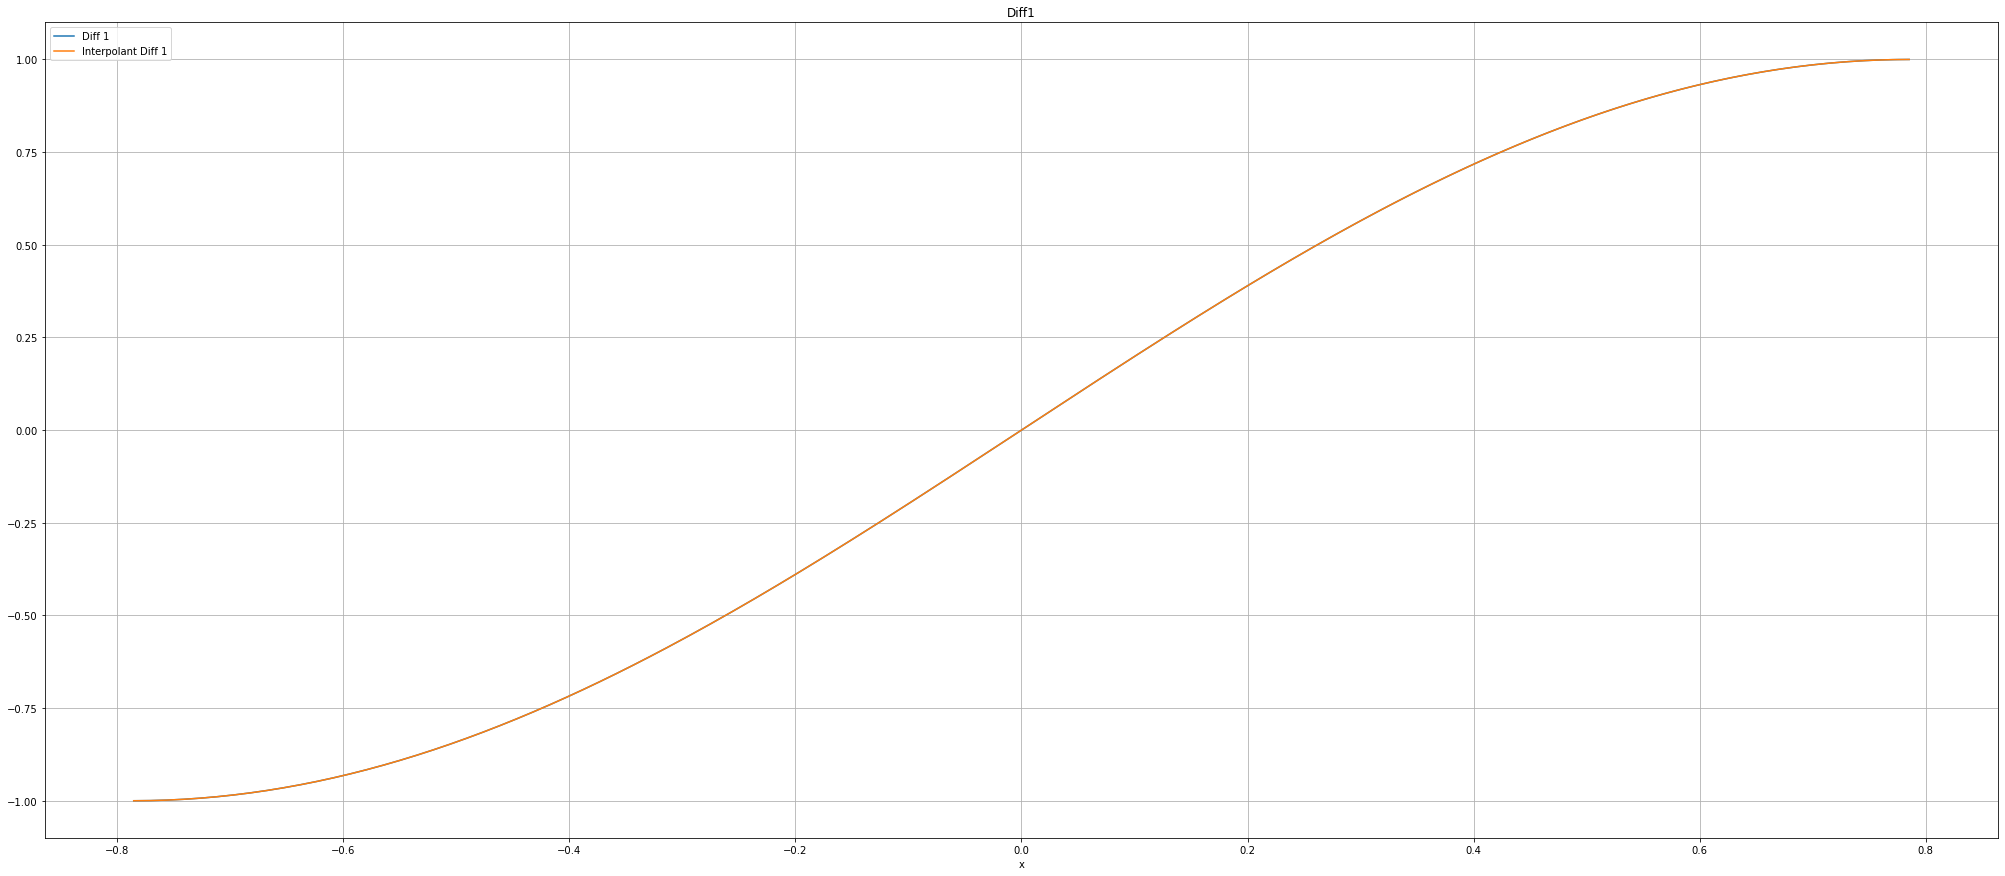

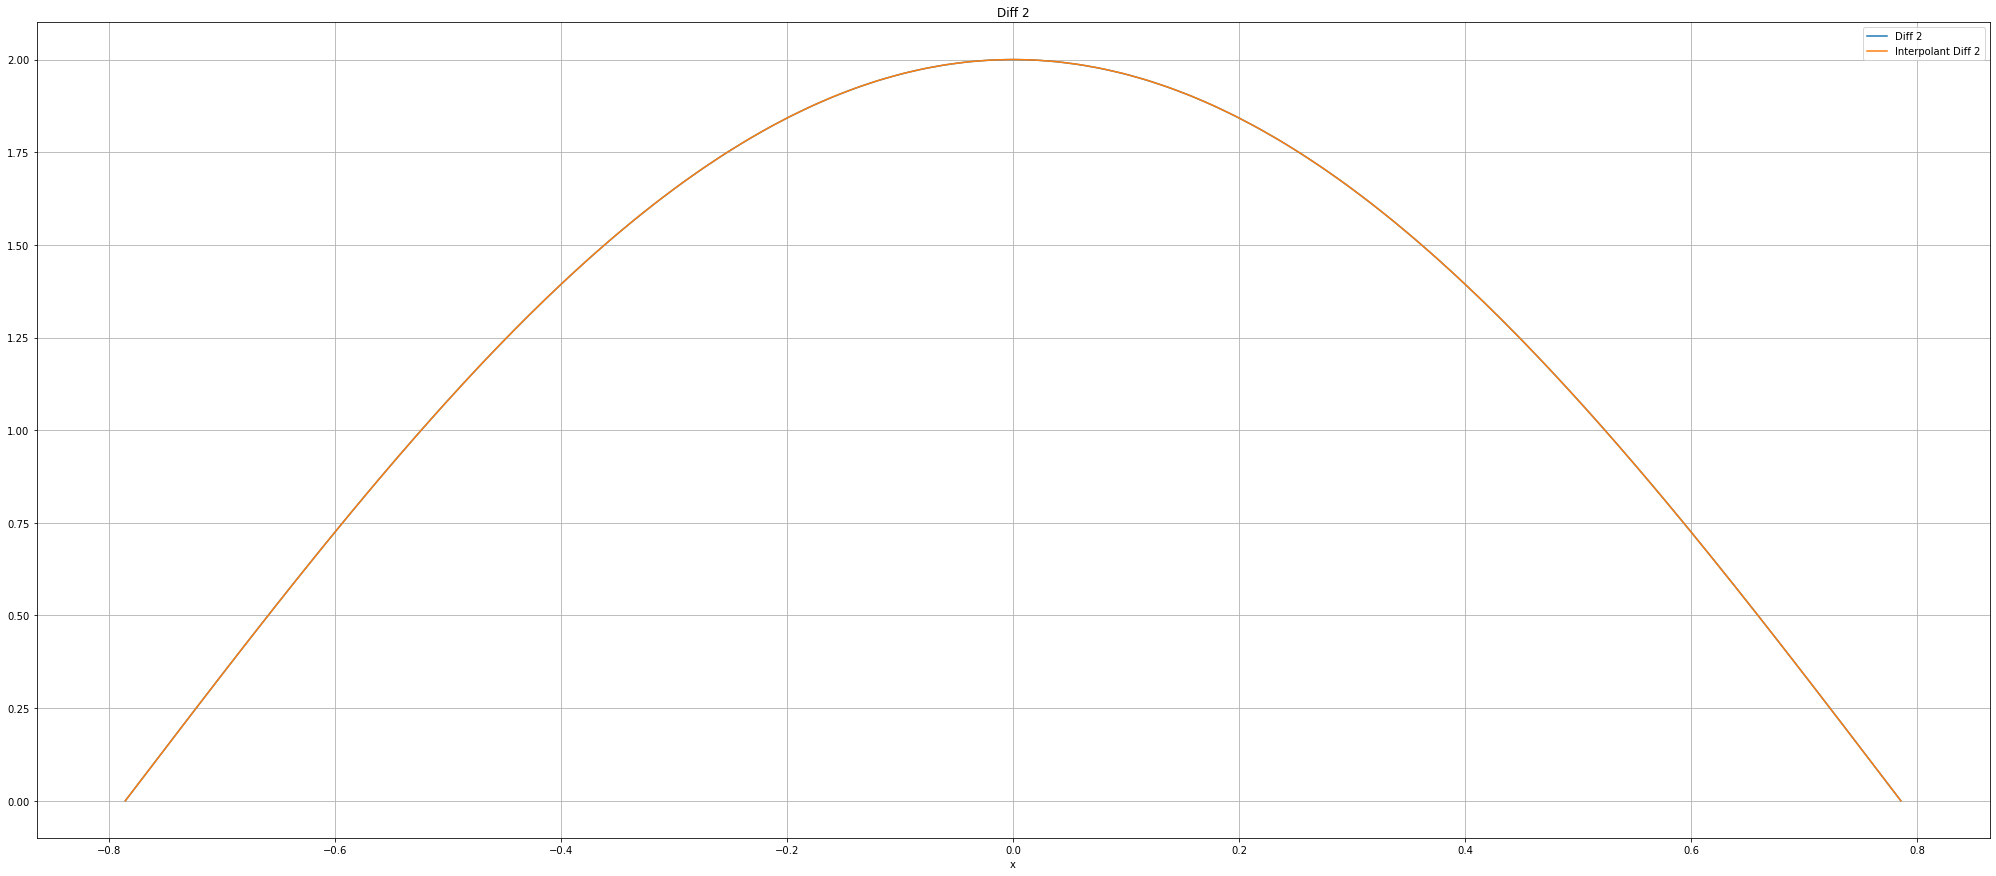

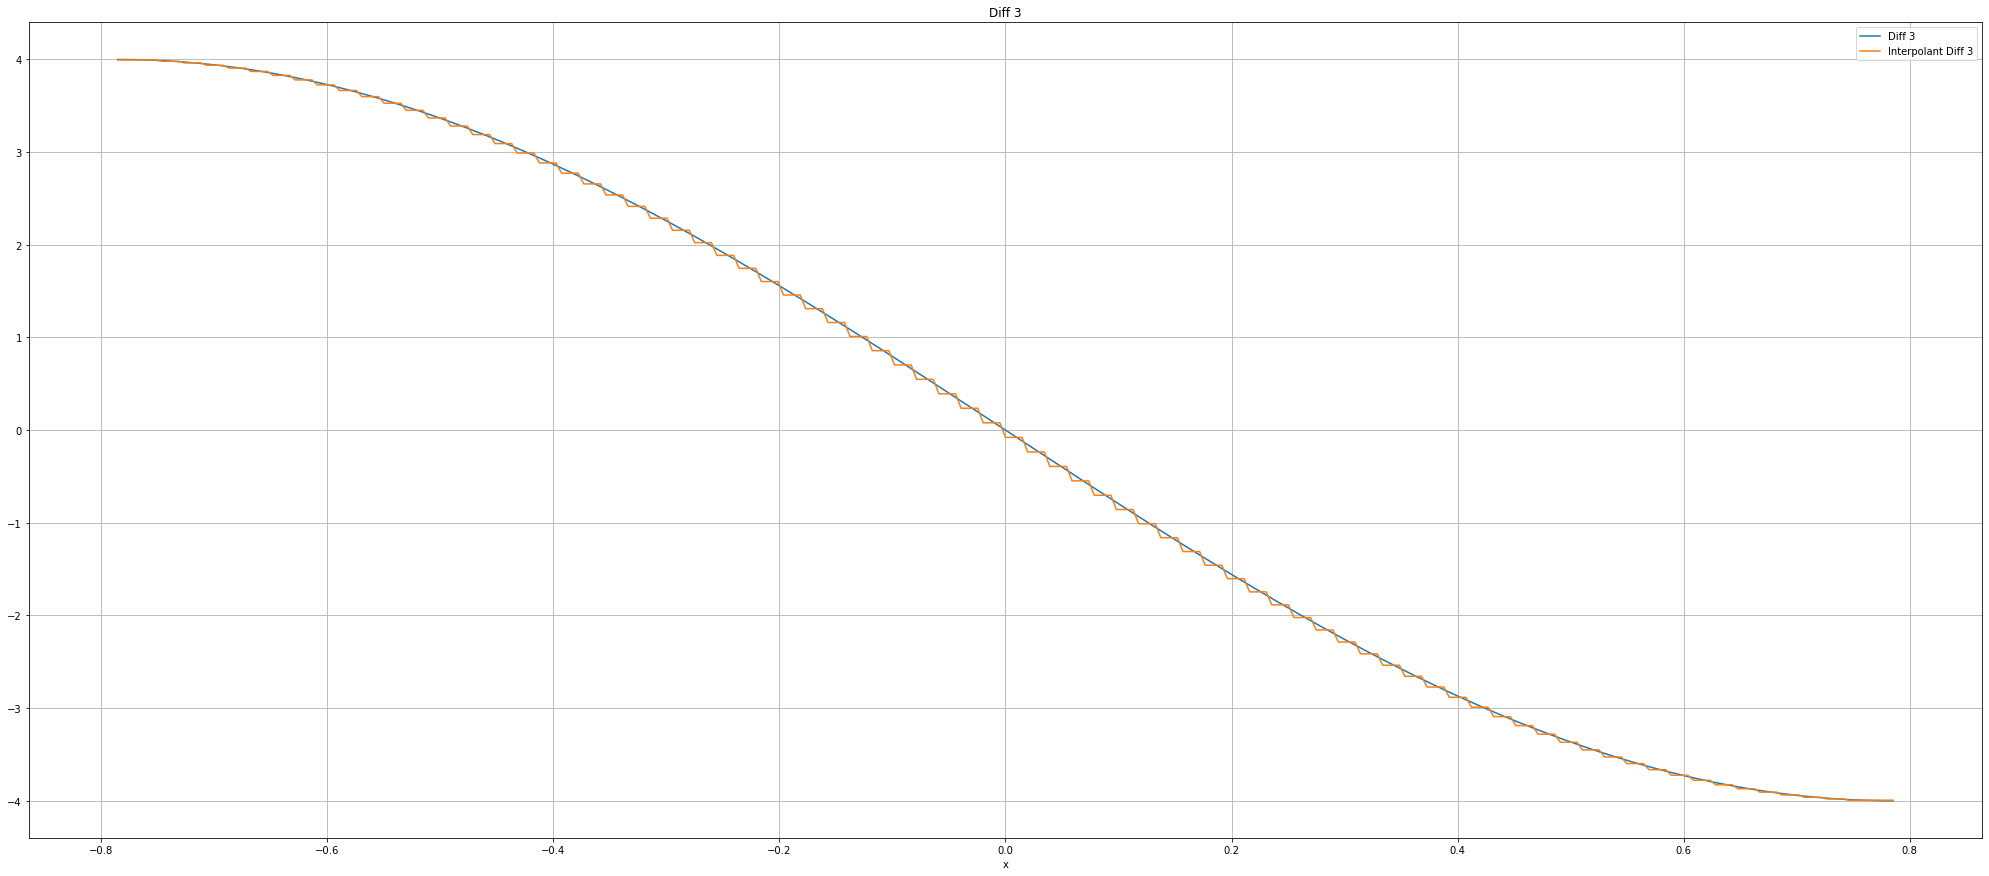

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  160



,x,f(x),Interpolant,error,Integral,Interpolant Integral,error,Diff 1,Interpolant Diff 1,error,Diff 2,Interpolant Diff 2,error,Diff 3,Interpolant Diff 3,error
0,-0.785398,0.500000,0.500000,0.000000e+00,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000e+00,2.586105e-08,4.440892e-16,0.000009,9.416465e-06,4.000000,3.998655,1.344670e-03
1,-0.782944,0.497546,0.497546,3.841227e-11,0.001224,0.001224,5.672286e-14,-0.999988,-9.999880e-01,6.775471e-09,9.817438e-03,0.009824,6.155575e-06,3.999952,3.998655,1.296478e-03
2,-0.780489,0.495091,0.495091,3.962480e-11,0.002442,0.002442,1.581582e-13,-0.999952,-9.999518e-01,4.548594e-09,1.963464e-02,0.019638,3.131243e-06,3.999807,3.998655,1.151906e-03
3,-0.778035,0.492637,0.492637,2.173750e-11,0.003654,0.003654,2.356639e-13,-0.999892,-9.998916e-01,8.982044e-09,2.945137e-02,0.029452,5.800204e-07,3.999566,3.998655,9.109548e-04
4,-0.775581,0.490183,0.490183,0.000000e+00,0.004861,0.004861,2.618218e-13,-0.999807,-9.998072e-01,7.976345e-09,3.926738e-02,0.039266,1.261552e-06,3.999229,3.998655,5.736318e-04
5,-0.773126,0.487729,0.487729,1.461287e-11,0.006061,0.006061,2.416678e-13,-0.999699,-9.996988e-01,3.563503e-09,4.908246e-02,0.049080,2.156950e-06,3.998795,3.998655,1.399446e-04
6,-0.770672,0.485276,0.485276,1.682632e-11,0.007255,0.007255,2.004265e-13,-0.999566,-9.995663e-01,1.643986e-09,5.889635e-02,0.058894,1.869674e-06,3.998265,3.998655,3.900962e-04
7,-0.768218,0.482823,0.482823,8.489265e-12,0.008443,0.008443,1.679334e-13,-0.999410,-9.994097e-01,4.453200e-09,6.870882e-02,0.068709,1.632514e-07,3.997639,3.998655,1.016478e-03
8,-0.765763,0.480370,0.480370,0.000000e+00,0.009625,0.009625,1.591539e-13,-0.999229,-9.992290e-01,1.090871e-09,7.851963e-02,0.078523,3.198756e-06,3.996916,3.995159,1.757460e-03
9,-0.763309,0.477918,0.477918,3.113232e-12,0.010801,0.010801,1.569942e-13,-0.999024,-9.990243e-01,2.264763e-09,8.832855e-02,0.088328,1.293112e-07,3.996097,3.995159,9.384438e-04



Max_errors:	
Integral:	2.618218142291795e-13	
Function:	1.9354380211266406e-10	
Diff 1:	5.914178231782724e-08	
Diff 2:	6.425606270132889e-05	
Diff 3:	0.03926990816199077



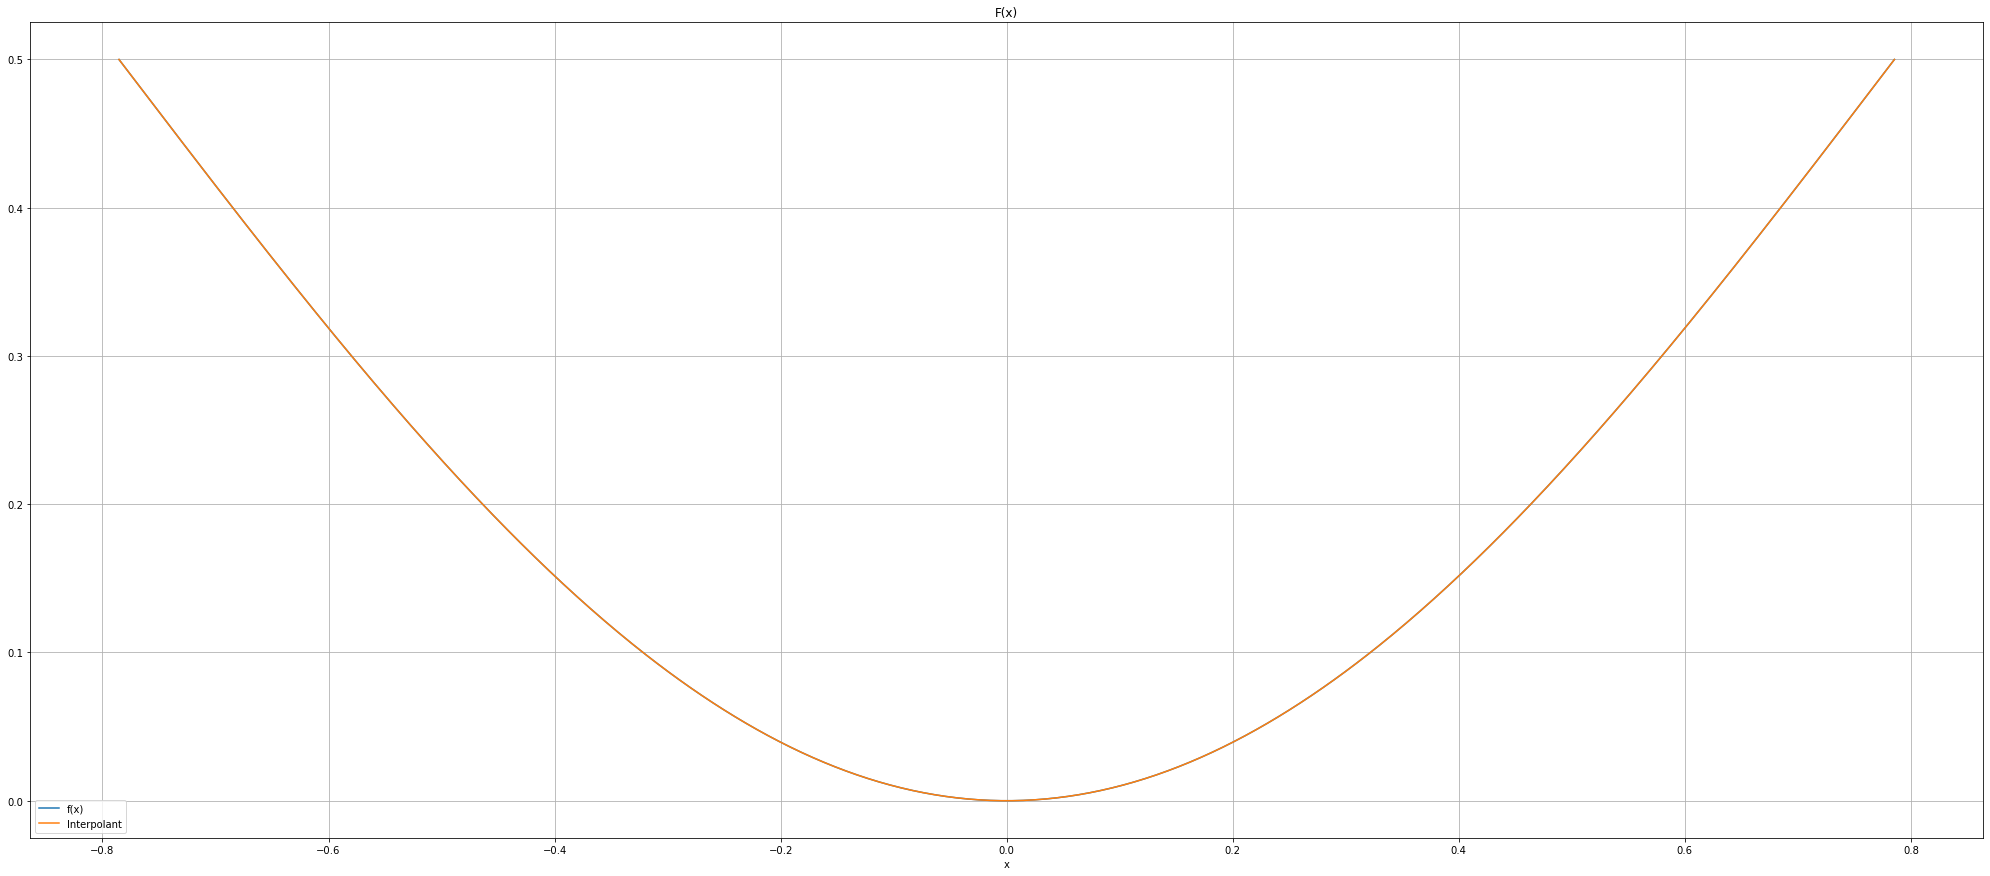

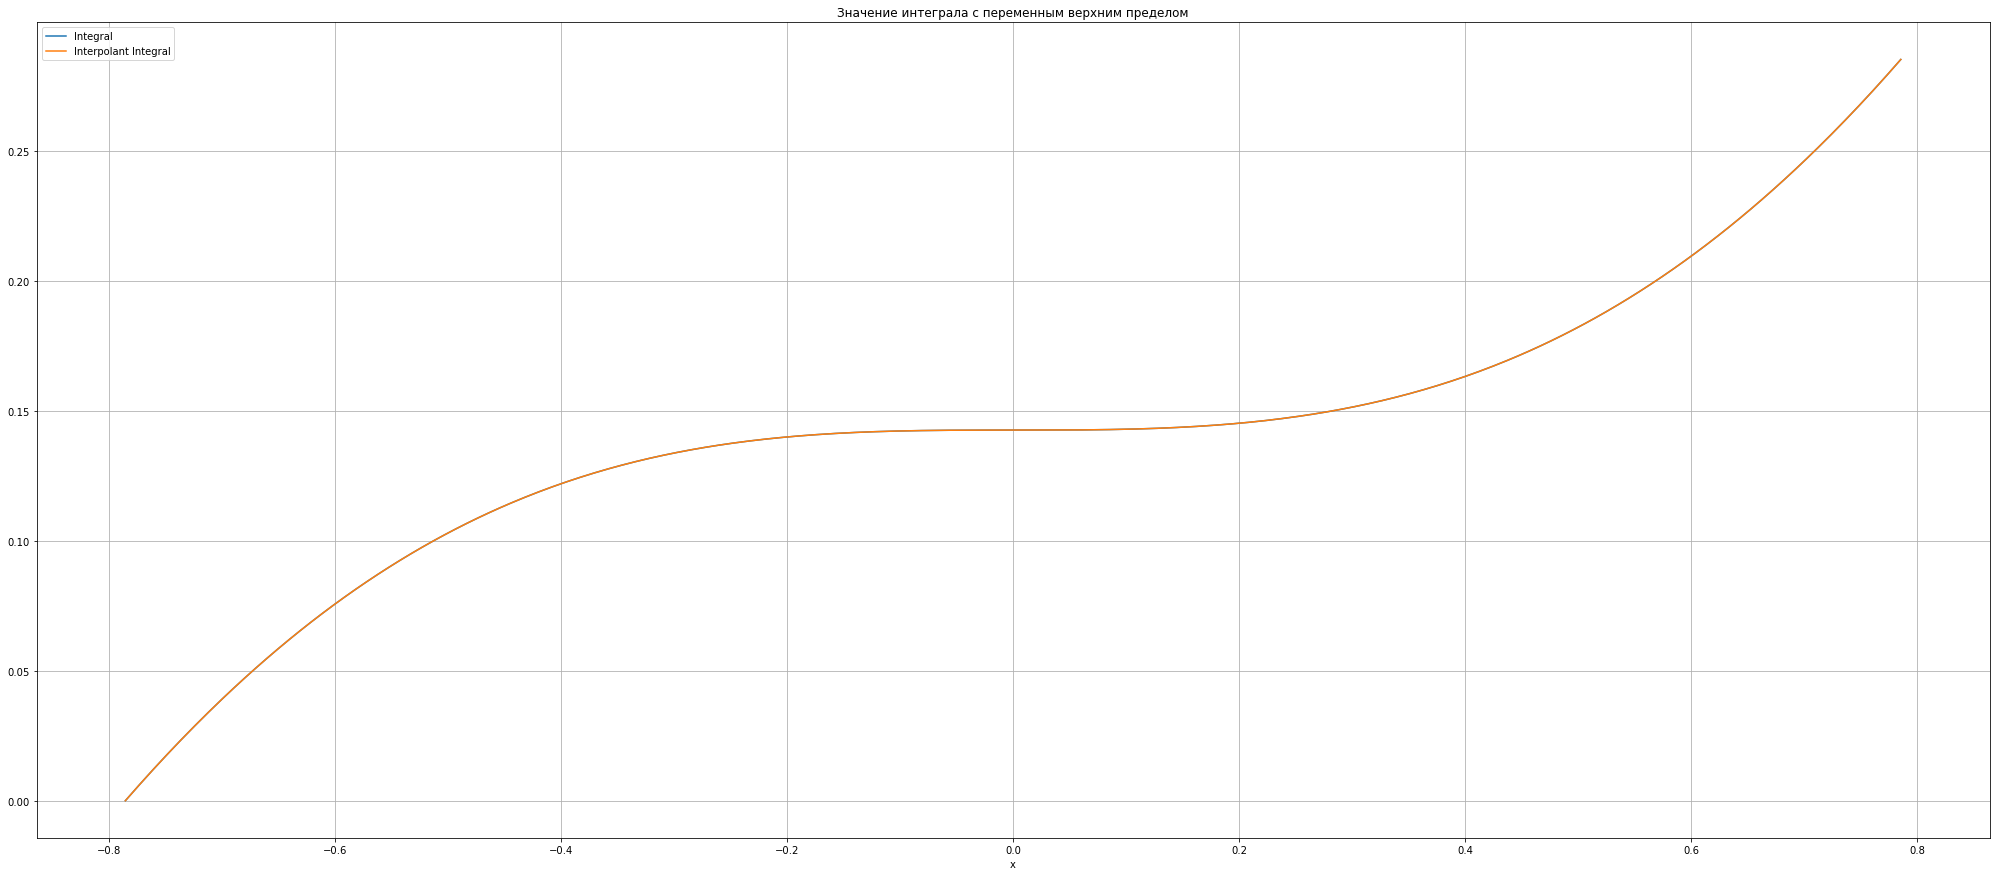

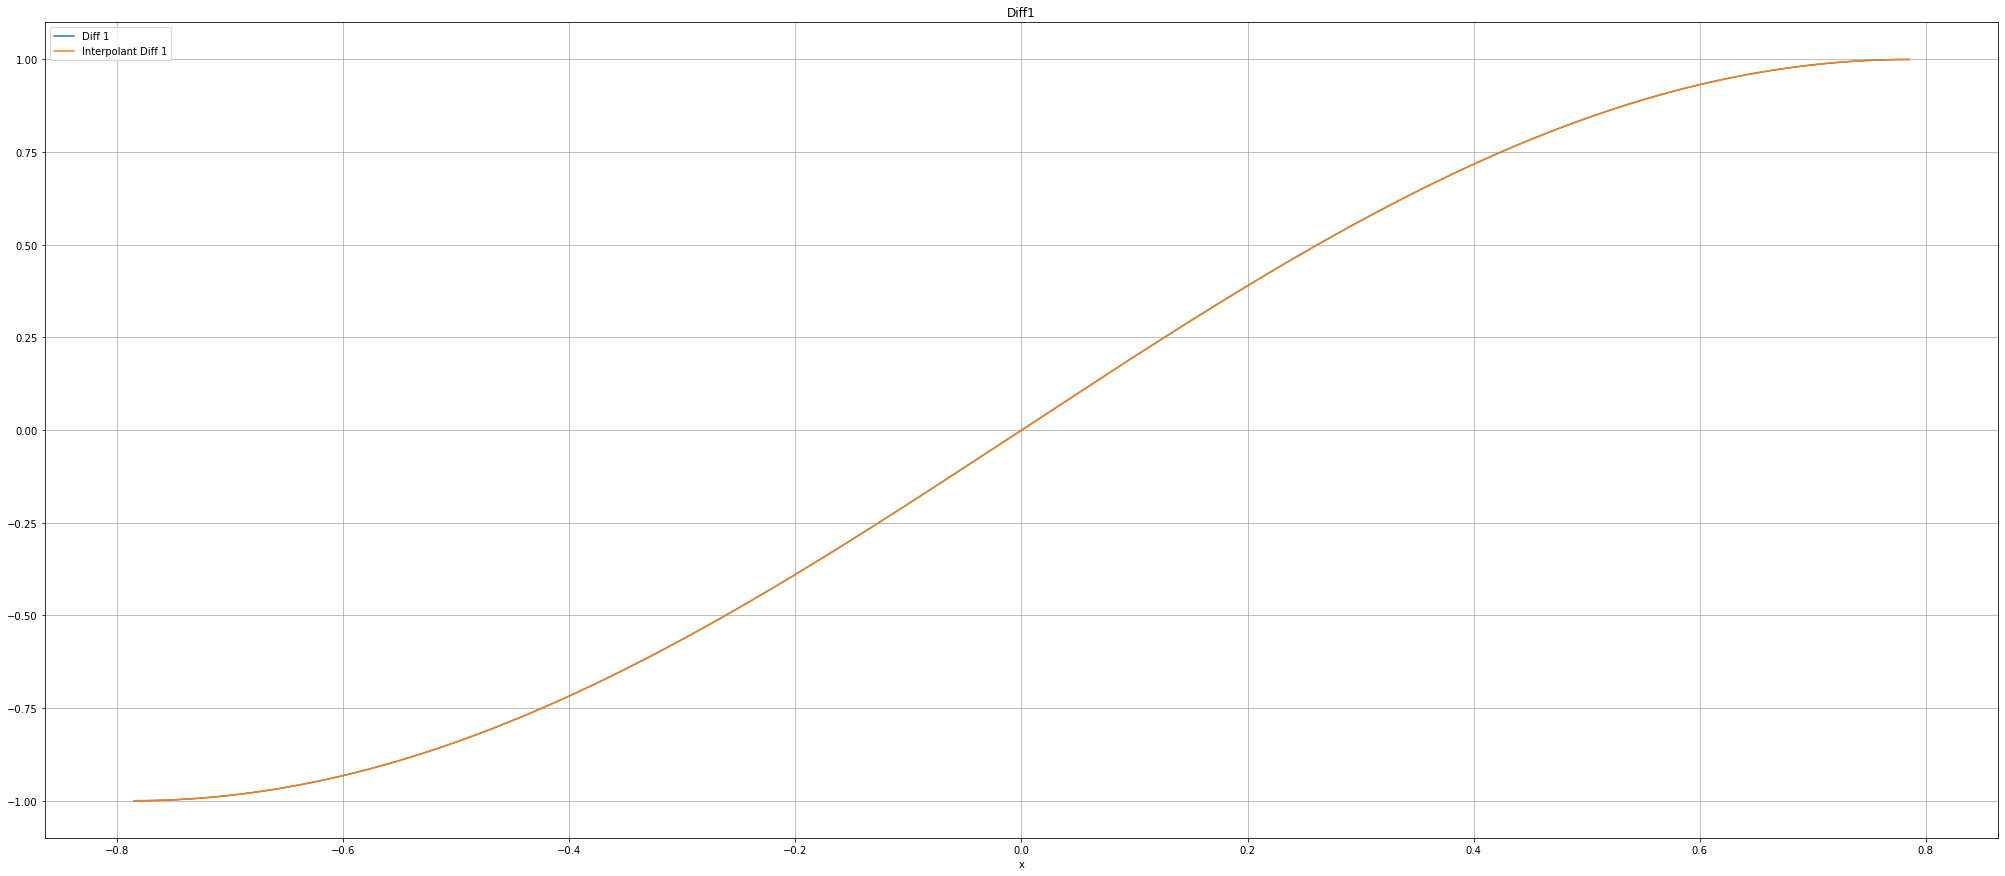

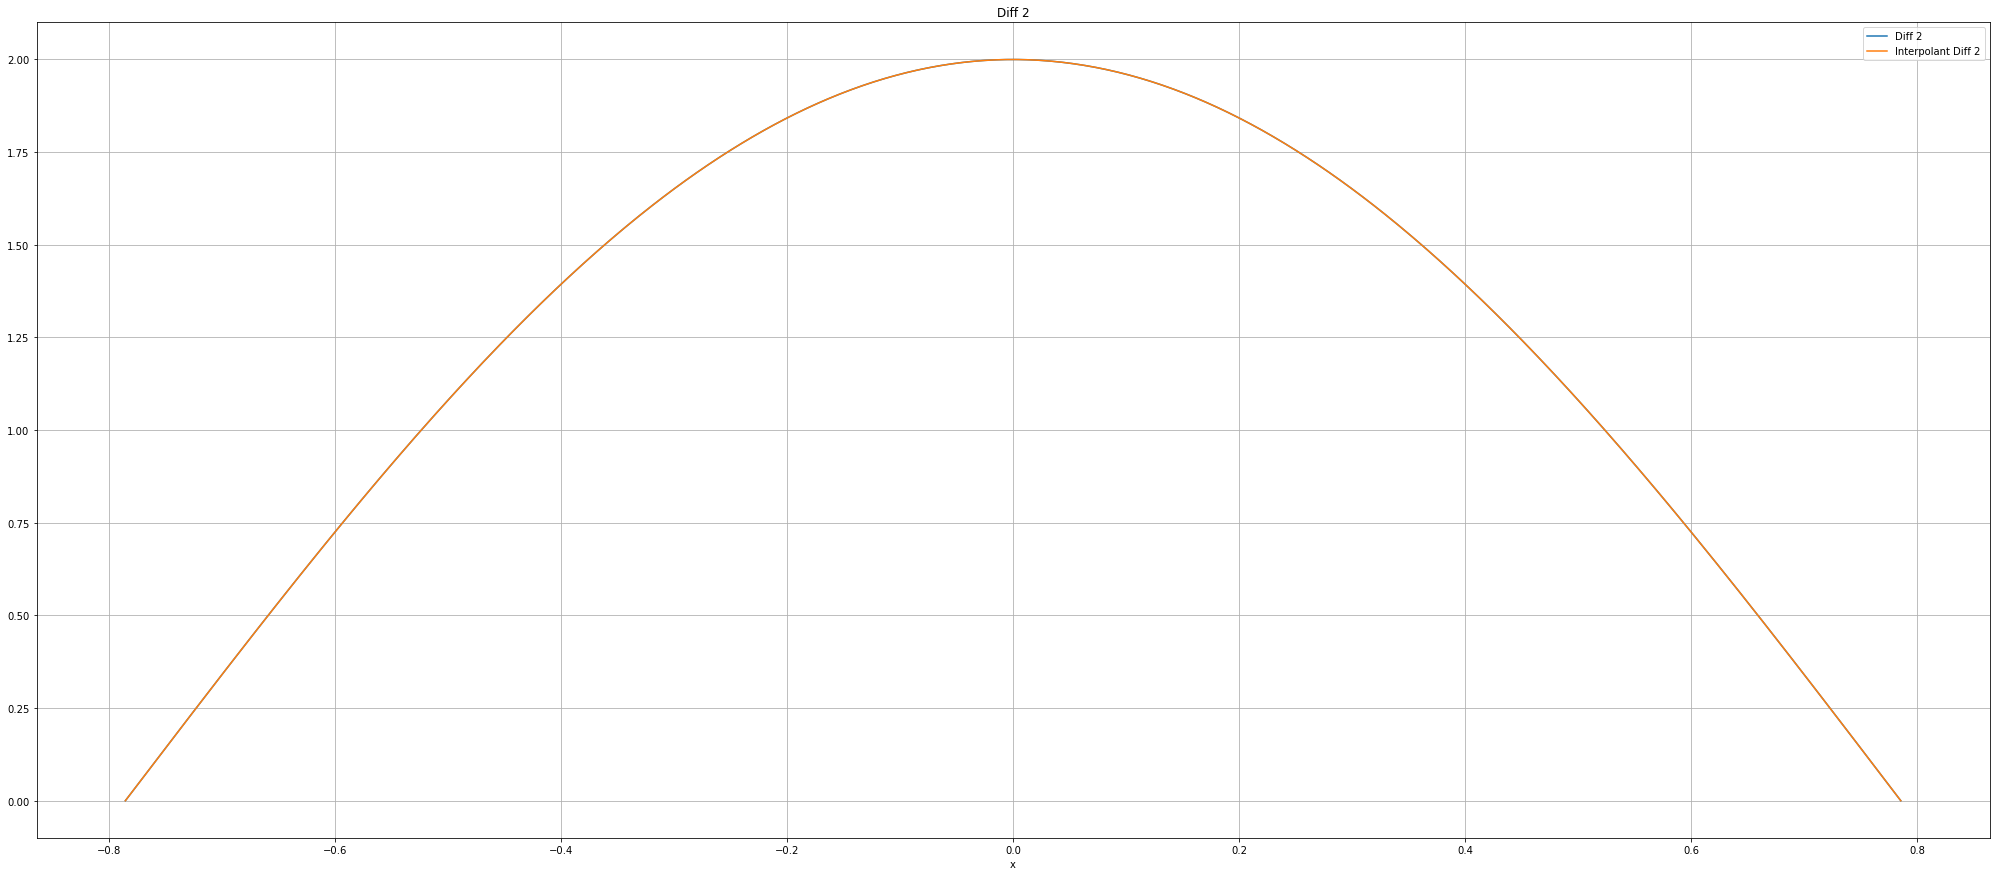

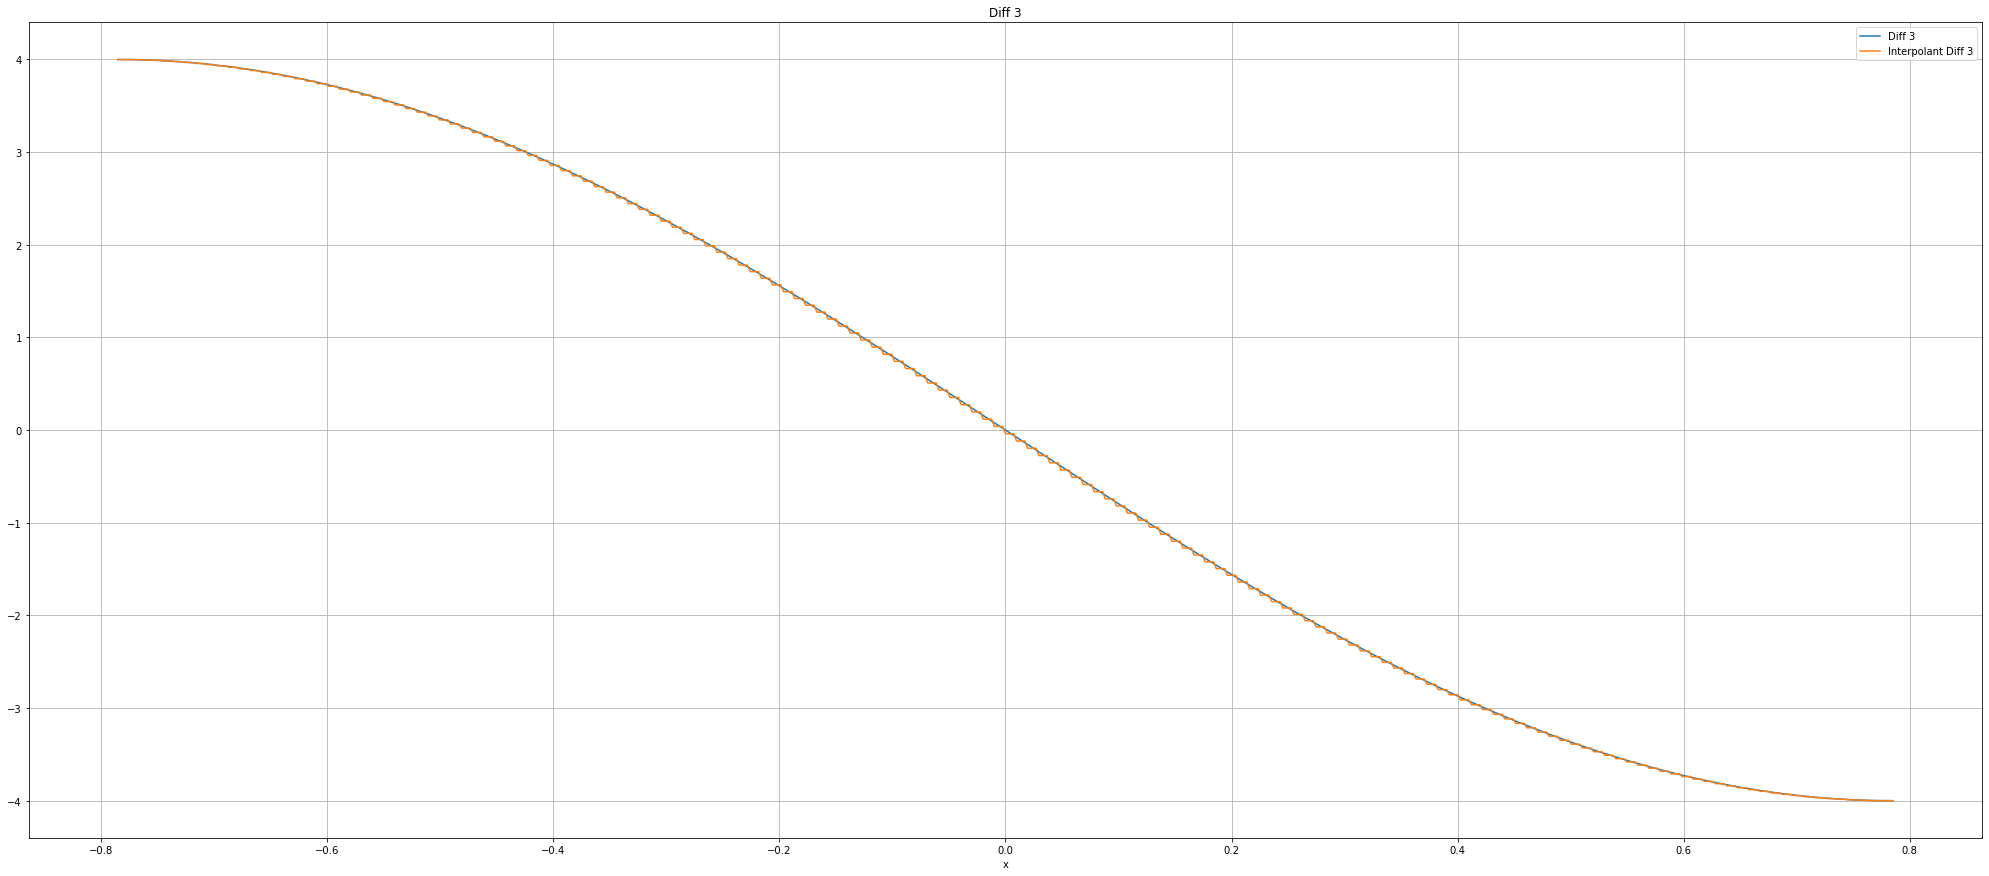

In [11]:
for N in number_partions:
    print("//////////////////////////////////////////////////"*3)
    print("\n\n", "\t"*5, "Количество узлов интерполяции N = ", N, end='\n\n')
    # Create Spline
    xdata = [x_spline(i) for i in range(N + 1)]
    ydata = list(map(lambda x: F(x), xdata))
    approx_spline = cubSplineInterpECnd(xdata, ydata)
    # Подготовка к выводу
    x = [x_value(i) for i in range(4*N + 1)]
    y = list(map(lambda x: F(x), x))
    spline_value = list(map(lambda x: cubSplineValue(x, approx_spline), x))
    error = [abs(y[i] - spline_value[i]) for i in range(4*N + 1)]   

    integral_value_data = [integral_func((x_value(i))) for i in range(4*N + 1)]
    integral_interpolant = list(map(lambda x_i: cubSplineIntegral(a, x_i, approx_spline), x))
    error_integral = [integral_value_data[i] - integral_interpolant[i]  for i in range(4*N + 1)]

    first_diff_data = list(map(lambda x: first_diff(x), x))
    diff_1 = list(map(lambda x_i: cubSplineValue(x_i, approx_spline, 1), x))
    error_diff_1 = [abs(diff_1[i] - first_diff_data[i])  for i in range(4*N + 1)]

    second_diff_data = list(map(lambda x: second_diff(x), x))
    diff_2 = list(map(lambda x_i: cubSplineValue(x_i, approx_spline, 2), x))
    error_diff_2 = [abs(diff_2[i] - second_diff_data[i])  for i in range(4*N + 1)]

    third_diff_data = list(map(lambda x: third_diff(x), x))
    diff_3 = list(map(lambda x_i: cubSplineValue(x_i, approx_spline, 3), x))
    error_diff_3 = [abs(diff_3[i] - third_diff_data[i])  for i in range(4*N + 1)]
    
    # все массивы соразмерные, поэтому уместно использовать zip()
    dataframe = pd.DataFrame(list(zip(x, y, spline_value, error, 
                                      integral_value_data, integral_interpolant, error_integral,
                                      first_diff_data, diff_1, error_diff_1,
                                      second_diff_data, diff_2, error_diff_2,
                                      third_diff_data, diff_3, error_diff_3)),
                                      
                                      columns = ['x', 'f(x)','Interpolant', 'error',
                                                 'Integral', 'Interpolant Integral', 'error',
                                                 'Diff 1', 'Interpolant Diff 1', 'error',
                                                 'Diff 2', 'Interpolant Diff 2', 'error',
                                                 'Diff 3', 'Interpolant Diff 3', 'error',])
    display(HTML(dataframe.to_html()))
    print('\nMax_errors:',
          '\nIntegral:', max(error_integral),
          '\nFunction:', max(error),
          '\nDiff 1:', max(error_diff_1),
          '\nDiff 2:', max(error_diff_2),
          '\nDiff 3:', max(error_diff_3), sep='\t', end='\n\n')
    
    max_error_Integral.append(max(error_integral))
    max_error_Spline.append(max(error))
    max_error_Diff_1.append(max(error_diff_1))
    max_error_Diff_2.append(max(error_diff_2))
    max_error_Diff_3.append(max(error_diff_3))
    
    %matplotlib inline
    plt.rcParams["figure.figsize"] = (35,15)
    dataframe.plot(x='x', y=['f(x)', 'Interpolant'], title='F(x)', grid=True, subplots=False)
    dataframe.plot(x='x', y=['Integral', 'Interpolant Integral'], title='Значение интеграла с переменным верхним пределом', grid=True, subplots=False)
    dataframe.plot(x='x', y=['Diff 1', 'Interpolant Diff 1'], title='Diff1', grid=True, subplots=False)
    dataframe.plot(x='x', y=['Diff 2', 'Interpolant Diff 2'], title='Diff 2', grid=True, subplots=False)
    dataframe.plot(x='x', y=['Diff 3', 'Interpolant Diff 3'], title='Diff 3', grid=True, subplots=False)
    plt.show()

# ==============================================================================================

## Отношение максимальных отклонений для 2-х соседних разбиений

In [12]:
estimate_analys = {}
for i in range(len(number_partions)):
    estimate_analys['Integral'] = [max_error_Integral[i]/max_error_Integral[i + 1] for i in range(len(number_partions) - 1)]
    estimate_analys['Spline'] = [max_error_Spline[i]/max_error_Spline[i + 1] for i in range(len(number_partions) - 1)]
    estimate_analys['Diff 1'] = [max_error_Diff_1[i]/max_error_Diff_1[i + 1] for i in range(len(number_partions) - 1)]
    estimate_analys['Diff 2'] = [max_error_Diff_2[i]/max_error_Diff_2[i + 1] for i in range(len(number_partions) - 1)]
    estimate_analys['Diff 3'] = [max_error_Diff_3[i]/max_error_Diff_3[i + 1] for i in range(len(number_partions) - 1)]    
index_list = [( str(number_partions[i]) + '/' + str(number_partions[i + 1]) ) for i in range(len(number_partions) - 1)]
estimate_dataframe = pd.DataFrame(estimate_analys, index=index_list)
display(HTML(estimate_dataframe.to_html()))

,Integral,Spline,Diff 1,Diff 2,Diff 3
10/20,63.128910,31.561484,15.791448,7.901209,1.993598
20/40,63.782786,26.069540,15.947958,4.669607,2.000003
40/80,63.945726,16.009246,13.977073,4.000616,2.000000
80/160,63.988544,16.002313,8.000813,4.000154,2.000000
